In [7]:
import cv2
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import random
import pathlib
from pathlib2 import Path
import glob 

In [1]:
pip list

Package                       Version         Editable project locationNote: you may need to restart the kernel to use updated packages.

----------------------------- --------------- ---------------------------------------------------------------------
aiobotocore                   2.5.0
aiofiles                      22.1.0
aiohttp                       3.8.5
aioitertools                  0.7.1
aiosignal                     1.2.0
aiosqlite                     0.18.0
alabaster                     0.7.12
anaconda-anon-usage           0.4.2
anaconda-catalogs             0.2.0
anaconda-client               1.12.1
anaconda-cloud-auth           0.1.3
anaconda-navigator            2.5.0
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens           

In [8]:
def find_png_files(data_path):
    data_path = Path('C:/Users/HP/Desktop/Task_Astrocytes')
    events_mask = data_path / '*'
    file_names = glob.glob(str(events_mask))
    return file_names


def create_df_for_dataset_type(data_path, dataset_type):
    events_mask =  str(data_path / dataset_type / '**' / '*.png')
    file_names = glob.glob(events_mask)
    data = []
    for file_path in tqdm(file_names):
        file_path = Path(file_path)
        name = file_path.stem
        name_parts, frame_id = name.split('_t')
        image_name = str(file_path.relative_to(data_path))
        status = file_path.parents[0].stem
        image = cv2.imread(str(file_path))
        data_size= image.shape
        data.append([image_name, name, dataset_type, data_size, str(file_path), status, int(frame_id)])
    columns = ['image_name', 'name', 'dataset_type', 'data_size', 'file_path', 'status', 'frame_id']
    df = pd.DataFrame(data, columns=columns)
    return df.sort_values(by = 'frame_id')

data_path = Path('C:/Users/HP/Desktop/Task_Astrocytes')
for dataset_type in find_png_files(data_path):
    print(create_df_for_dataset_type(data_path, dataset_type))


  0%|          | 0/600 [00:00<?, ?it/s]

100%|██████████| 600/600 [00:04<00:00, 141.63it/s]


                                            image_name           name   
0    2016-05-18_fileNo11_BM3D_z-max\events\event_t1...       event_t1  \
300  2016-05-18_fileNo11_BM3D_z-max\images\smoothed...    smoothed_t1   
411  2016-05-18_fileNo11_BM3D_z-max\images\smoothed...    smoothed_t2   
111  2016-05-18_fileNo11_BM3D_z-max\events\event_t2...       event_t2   
222  2016-05-18_fileNo11_BM3D_z-max\events\event_t3...       event_t3   
..                                                 ...            ...   
520  2016-05-18_fileNo11_BM3D_z-max\images\smoothed...  smoothed_t298   
221  2016-05-18_fileNo11_BM3D_z-max\events\event_t2...     event_t299   
521  2016-05-18_fileNo11_BM3D_z-max\images\smoothed...  smoothed_t299   
224  2016-05-18_fileNo11_BM3D_z-max\events\event_t3...     event_t300   
524  2016-05-18_fileNo11_BM3D_z-max\images\smoothed...  smoothed_t300   

                                          dataset_type      data_size   
0    C:\Users\HP\Desktop\Task_Astrocytes\2016-05-1

100%|██████████| 600/600 [00:03<00:00, 194.99it/s]


                                            image_name           name   
0    2016-05-26_fileNo32_BM3D_z-max\events\event_t1...       event_t1  \
300  2016-05-26_fileNo32_BM3D_z-max\images\smoothed...    smoothed_t1   
411  2016-05-26_fileNo32_BM3D_z-max\images\smoothed...    smoothed_t2   
111  2016-05-26_fileNo32_BM3D_z-max\events\event_t2...       event_t2   
222  2016-05-26_fileNo32_BM3D_z-max\events\event_t3...       event_t3   
..                                                 ...            ...   
520  2016-05-26_fileNo32_BM3D_z-max\images\smoothed...  smoothed_t298   
221  2016-05-26_fileNo32_BM3D_z-max\events\event_t2...     event_t299   
521  2016-05-26_fileNo32_BM3D_z-max\images\smoothed...  smoothed_t299   
224  2016-05-26_fileNo32_BM3D_z-max\events\event_t3...     event_t300   
524  2016-05-26_fileNo32_BM3D_z-max\images\smoothed...  smoothed_t300   

                                          dataset_type      data_size   
0    C:\Users\HP\Desktop\Task_Astrocytes\2016-05-2

100%|██████████| 600/600 [00:04<00:00, 129.79it/s]


                                    image_name           name   
0         31_08_2020_tser1\events\event_t1.png       event_t1  \
300    31_08_2020_tser1\images\smoothed_t1.png    smoothed_t1   
411    31_08_2020_tser1\images\smoothed_t2.png    smoothed_t2   
111       31_08_2020_tser1\events\event_t2.png       event_t2   
222       31_08_2020_tser1\events\event_t3.png       event_t3   
..                                         ...            ...   
520  31_08_2020_tser1\images\smoothed_t298.png  smoothed_t298   
221     31_08_2020_tser1\events\event_t299.png     event_t299   
521  31_08_2020_tser1\images\smoothed_t299.png  smoothed_t299   
224     31_08_2020_tser1\events\event_t300.png     event_t300   
524  31_08_2020_tser1\images\smoothed_t300.png  smoothed_t300   

                                          dataset_type      data_size   
0    C:\Users\HP\Desktop\Task_Astrocytes\31_08_2020...  (508, 243, 3)  \
300  C:\Users\HP\Desktop\Task_Astrocytes\31_08_2020...  (512, 247, 3)   


100%|██████████| 600/600 [00:04<00:00, 141.92it/s]


                                    image_name           name   
0         31_08_2020_tser2\events\event_t1.png       event_t1  \
300    31_08_2020_tser2\images\smoothed_t1.png    smoothed_t1   
411    31_08_2020_tser2\images\smoothed_t2.png    smoothed_t2   
111       31_08_2020_tser2\events\event_t2.png       event_t2   
222       31_08_2020_tser2\events\event_t3.png       event_t3   
..                                         ...            ...   
520  31_08_2020_tser2\images\smoothed_t298.png  smoothed_t298   
221     31_08_2020_tser2\events\event_t299.png     event_t299   
521  31_08_2020_tser2\images\smoothed_t299.png  smoothed_t299   
224     31_08_2020_tser2\events\event_t300.png     event_t300   
524  31_08_2020_tser2\images\smoothed_t300.png  smoothed_t300   

                                          dataset_type      data_size   
0    C:\Users\HP\Desktop\Task_Astrocytes\31_08_2020...  (508, 243, 3)  \
300  C:\Users\HP\Desktop\Task_Astrocytes\31_08_2020...  (512, 247, 3)   


100%|██████████| 600/600 [00:04<00:00, 125.90it/s]


                                    image_name           name   
0         31_08_2020_tser3\events\event_t1.png       event_t1  \
300    31_08_2020_tser3\images\smoothed_t1.png    smoothed_t1   
411    31_08_2020_tser3\images\smoothed_t2.png    smoothed_t2   
111       31_08_2020_tser3\events\event_t2.png       event_t2   
222       31_08_2020_tser3\events\event_t3.png       event_t3   
..                                         ...            ...   
520  31_08_2020_tser3\images\smoothed_t298.png  smoothed_t298   
221     31_08_2020_tser3\events\event_t299.png     event_t299   
521  31_08_2020_tser3\images\smoothed_t299.png  smoothed_t299   
224     31_08_2020_tser3\events\event_t300.png     event_t300   
524  31_08_2020_tser3\images\smoothed_t300.png  smoothed_t300   

                                          dataset_type      data_size   
0    C:\Users\HP\Desktop\Task_Astrocytes\31_08_2020...  (247, 243, 3)  \
300  C:\Users\HP\Desktop\Task_Astrocytes\31_08_2020...  (251, 247, 3)   


100%|██████████| 600/600 [00:05<00:00, 118.64it/s]

                                    image_name           name   
0         31_08_2020_tser4\events\event_t1.png       event_t1  \
300    31_08_2020_tser4\images\smoothed_t1.png    smoothed_t1   
411    31_08_2020_tser4\images\smoothed_t2.png    smoothed_t2   
111       31_08_2020_tser4\events\event_t2.png       event_t2   
222       31_08_2020_tser4\events\event_t3.png       event_t3   
..                                         ...            ...   
520  31_08_2020_tser4\images\smoothed_t298.png  smoothed_t298   
221     31_08_2020_tser4\events\event_t299.png     event_t299   
521  31_08_2020_tser4\images\smoothed_t299.png  smoothed_t299   
224     31_08_2020_tser4\events\event_t300.png     event_t300   
524  31_08_2020_tser4\images\smoothed_t300.png  smoothed_t300   

                                          dataset_type      data_size   
0    C:\Users\HP\Desktop\Task_Astrocytes\31_08_2020...  (508, 240, 3)  \
300  C:\Users\HP\Desktop\Task_Astrocytes\31_08_2020...  (512, 244, 3)   


In [14]:

def find_count_area(df, dataset_type):
    df_type = df[df['status'] == 'events']
    regions_count = []
    for index, row in df_type.iterrows():
        image_path = row['file_path']
        image = cv2.imread(str(image_path), cv2.IMREAD_GRAYSCALE)
        image_array = np.array(image)
        _, thresh = cv2.threshold(image_array, 175, 255, cv2.THRESH_BINARY)
        contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        regions_count.append(len(contours))
    df_areas = pd.DataFrame({
        'video': dataset_type,
        'image_index': df_type['frame_id'],
        'area': regions_count
    })
    return df_areas

for dataset_type in find_png_files(data_path):
    df = create_df_for_dataset_type(data_path, dataset_type)
    df_areas = find_count_area(df, dataset_type)
    print(df_areas)
        

  3%|▎         | 20/600 [00:00<00:02, 198.32it/s]

100%|██████████| 600/600 [00:04<00:00, 147.65it/s]


                                                 video  image_index  area
0    C:\Users\HP\Desktop\Task_Astrocytes\2016-05-18...            1     5
111  C:\Users\HP\Desktop\Task_Astrocytes\2016-05-18...            2     5
222  C:\Users\HP\Desktop\Task_Astrocytes\2016-05-18...            3     5
234  C:\Users\HP\Desktop\Task_Astrocytes\2016-05-18...            4     5
245  C:\Users\HP\Desktop\Task_Astrocytes\2016-05-18...            5     5
..                                                 ...          ...   ...
218  C:\Users\HP\Desktop\Task_Astrocytes\2016-05-18...          296    28
219  C:\Users\HP\Desktop\Task_Astrocytes\2016-05-18...          297    19
220  C:\Users\HP\Desktop\Task_Astrocytes\2016-05-18...          298    15
221  C:\Users\HP\Desktop\Task_Astrocytes\2016-05-18...          299    19
224  C:\Users\HP\Desktop\Task_Astrocytes\2016-05-18...          300    24

[300 rows x 3 columns]


100%|██████████| 600/600 [00:03<00:00, 191.63it/s]


                                                 video  image_index  area
0    C:\Users\HP\Desktop\Task_Astrocytes\2016-05-26...            1     3
111  C:\Users\HP\Desktop\Task_Astrocytes\2016-05-26...            2     2
222  C:\Users\HP\Desktop\Task_Astrocytes\2016-05-26...            3     2
234  C:\Users\HP\Desktop\Task_Astrocytes\2016-05-26...            4     2
245  C:\Users\HP\Desktop\Task_Astrocytes\2016-05-26...            5     2
..                                                 ...          ...   ...
218  C:\Users\HP\Desktop\Task_Astrocytes\2016-05-26...          296    15
219  C:\Users\HP\Desktop\Task_Astrocytes\2016-05-26...          297    16
220  C:\Users\HP\Desktop\Task_Astrocytes\2016-05-26...          298    19
221  C:\Users\HP\Desktop\Task_Astrocytes\2016-05-26...          299    17
224  C:\Users\HP\Desktop\Task_Astrocytes\2016-05-26...          300    17

[300 rows x 3 columns]


100%|██████████| 600/600 [00:04<00:00, 126.78it/s]


                                                 video  image_index  area
0    C:\Users\HP\Desktop\Task_Astrocytes\31_08_2020...            1    73
111  C:\Users\HP\Desktop\Task_Astrocytes\31_08_2020...            2    72
222  C:\Users\HP\Desktop\Task_Astrocytes\31_08_2020...            3    77
234  C:\Users\HP\Desktop\Task_Astrocytes\31_08_2020...            4    78
245  C:\Users\HP\Desktop\Task_Astrocytes\31_08_2020...            5    80
..                                                 ...          ...   ...
218  C:\Users\HP\Desktop\Task_Astrocytes\31_08_2020...          296    25
219  C:\Users\HP\Desktop\Task_Astrocytes\31_08_2020...          297    21
220  C:\Users\HP\Desktop\Task_Astrocytes\31_08_2020...          298    23
221  C:\Users\HP\Desktop\Task_Astrocytes\31_08_2020...          299    21
224  C:\Users\HP\Desktop\Task_Astrocytes\31_08_2020...          300    19

[300 rows x 3 columns]


100%|██████████| 600/600 [00:04<00:00, 146.61it/s]


                                                 video  image_index  area
0    C:\Users\HP\Desktop\Task_Astrocytes\31_08_2020...            1    26
111  C:\Users\HP\Desktop\Task_Astrocytes\31_08_2020...            2    26
222  C:\Users\HP\Desktop\Task_Astrocytes\31_08_2020...            3    28
234  C:\Users\HP\Desktop\Task_Astrocytes\31_08_2020...            4    28
245  C:\Users\HP\Desktop\Task_Astrocytes\31_08_2020...            5    28
..                                                 ...          ...   ...
218  C:\Users\HP\Desktop\Task_Astrocytes\31_08_2020...          296     2
219  C:\Users\HP\Desktop\Task_Astrocytes\31_08_2020...          297     2
220  C:\Users\HP\Desktop\Task_Astrocytes\31_08_2020...          298     2
221  C:\Users\HP\Desktop\Task_Astrocytes\31_08_2020...          299     2
224  C:\Users\HP\Desktop\Task_Astrocytes\31_08_2020...          300     2

[300 rows x 3 columns]


100%|██████████| 600/600 [00:02<00:00, 201.93it/s]


                                                 video  image_index  area
0    C:\Users\HP\Desktop\Task_Astrocytes\31_08_2020...            1    21
111  C:\Users\HP\Desktop\Task_Astrocytes\31_08_2020...            2    20
222  C:\Users\HP\Desktop\Task_Astrocytes\31_08_2020...            3    19
234  C:\Users\HP\Desktop\Task_Astrocytes\31_08_2020...            4    17
245  C:\Users\HP\Desktop\Task_Astrocytes\31_08_2020...            5    18
..                                                 ...          ...   ...
218  C:\Users\HP\Desktop\Task_Astrocytes\31_08_2020...          296    11
219  C:\Users\HP\Desktop\Task_Astrocytes\31_08_2020...          297    11
220  C:\Users\HP\Desktop\Task_Astrocytes\31_08_2020...          298    11
221  C:\Users\HP\Desktop\Task_Astrocytes\31_08_2020...          299    11
224  C:\Users\HP\Desktop\Task_Astrocytes\31_08_2020...          300    11

[300 rows x 3 columns]


100%|██████████| 600/600 [00:06<00:00, 97.30it/s] 


                                                 video  image_index  area
0    C:\Users\HP\Desktop\Task_Astrocytes\31_08_2020...            1     7
111  C:\Users\HP\Desktop\Task_Astrocytes\31_08_2020...            2     7
222  C:\Users\HP\Desktop\Task_Astrocytes\31_08_2020...            3     8
234  C:\Users\HP\Desktop\Task_Astrocytes\31_08_2020...            4     9
245  C:\Users\HP\Desktop\Task_Astrocytes\31_08_2020...            5     9
..                                                 ...          ...   ...
218  C:\Users\HP\Desktop\Task_Astrocytes\31_08_2020...          296    34
219  C:\Users\HP\Desktop\Task_Astrocytes\31_08_2020...          297    28
220  C:\Users\HP\Desktop\Task_Astrocytes\31_08_2020...          298    29
221  C:\Users\HP\Desktop\Task_Astrocytes\31_08_2020...          299    28
224  C:\Users\HP\Desktop\Task_Astrocytes\31_08_2020...          300    29

[300 rows x 3 columns]


  0%|          | 0/600 [00:00<?, ?it/s]

100%|██████████| 600/600 [00:05<00:00, 109.80it/s]


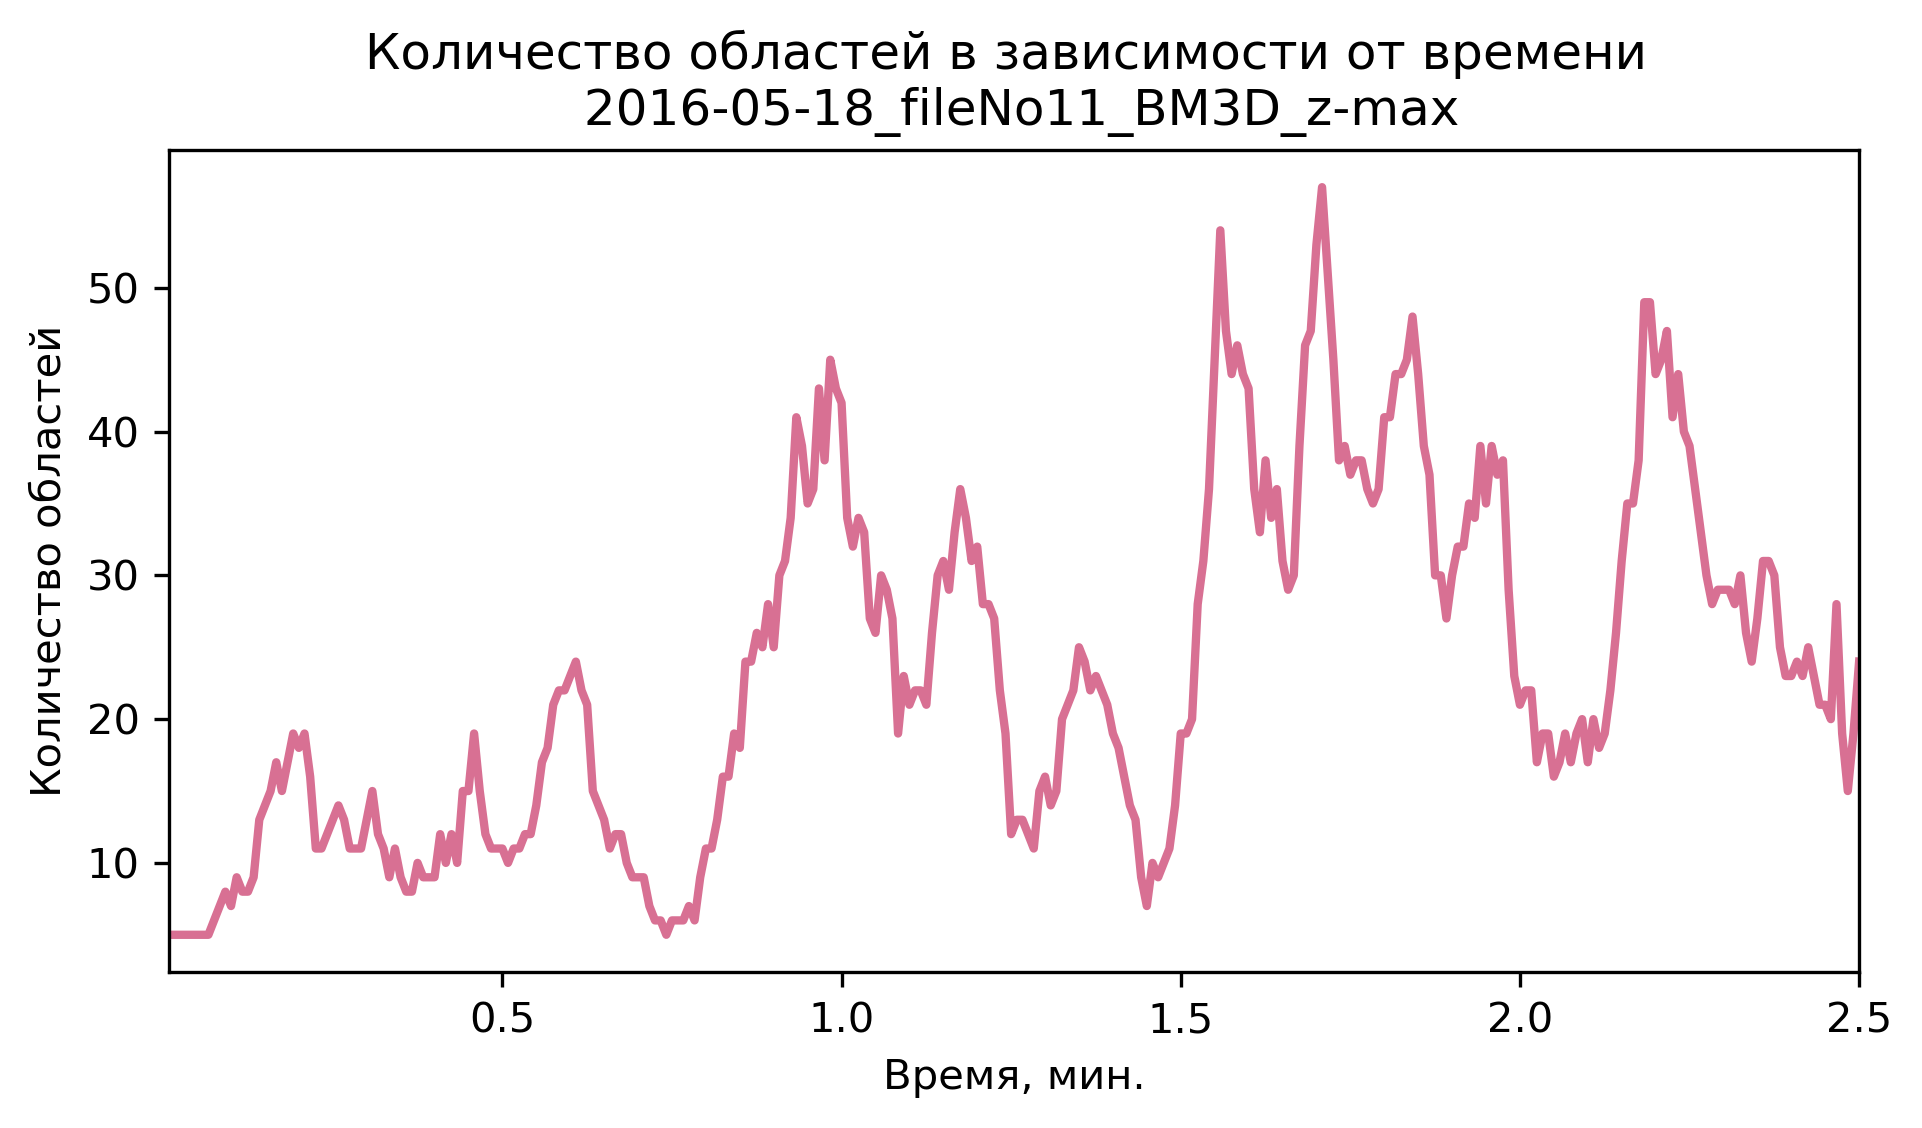

100%|██████████| 600/600 [00:01<00:00, 318.97it/s]


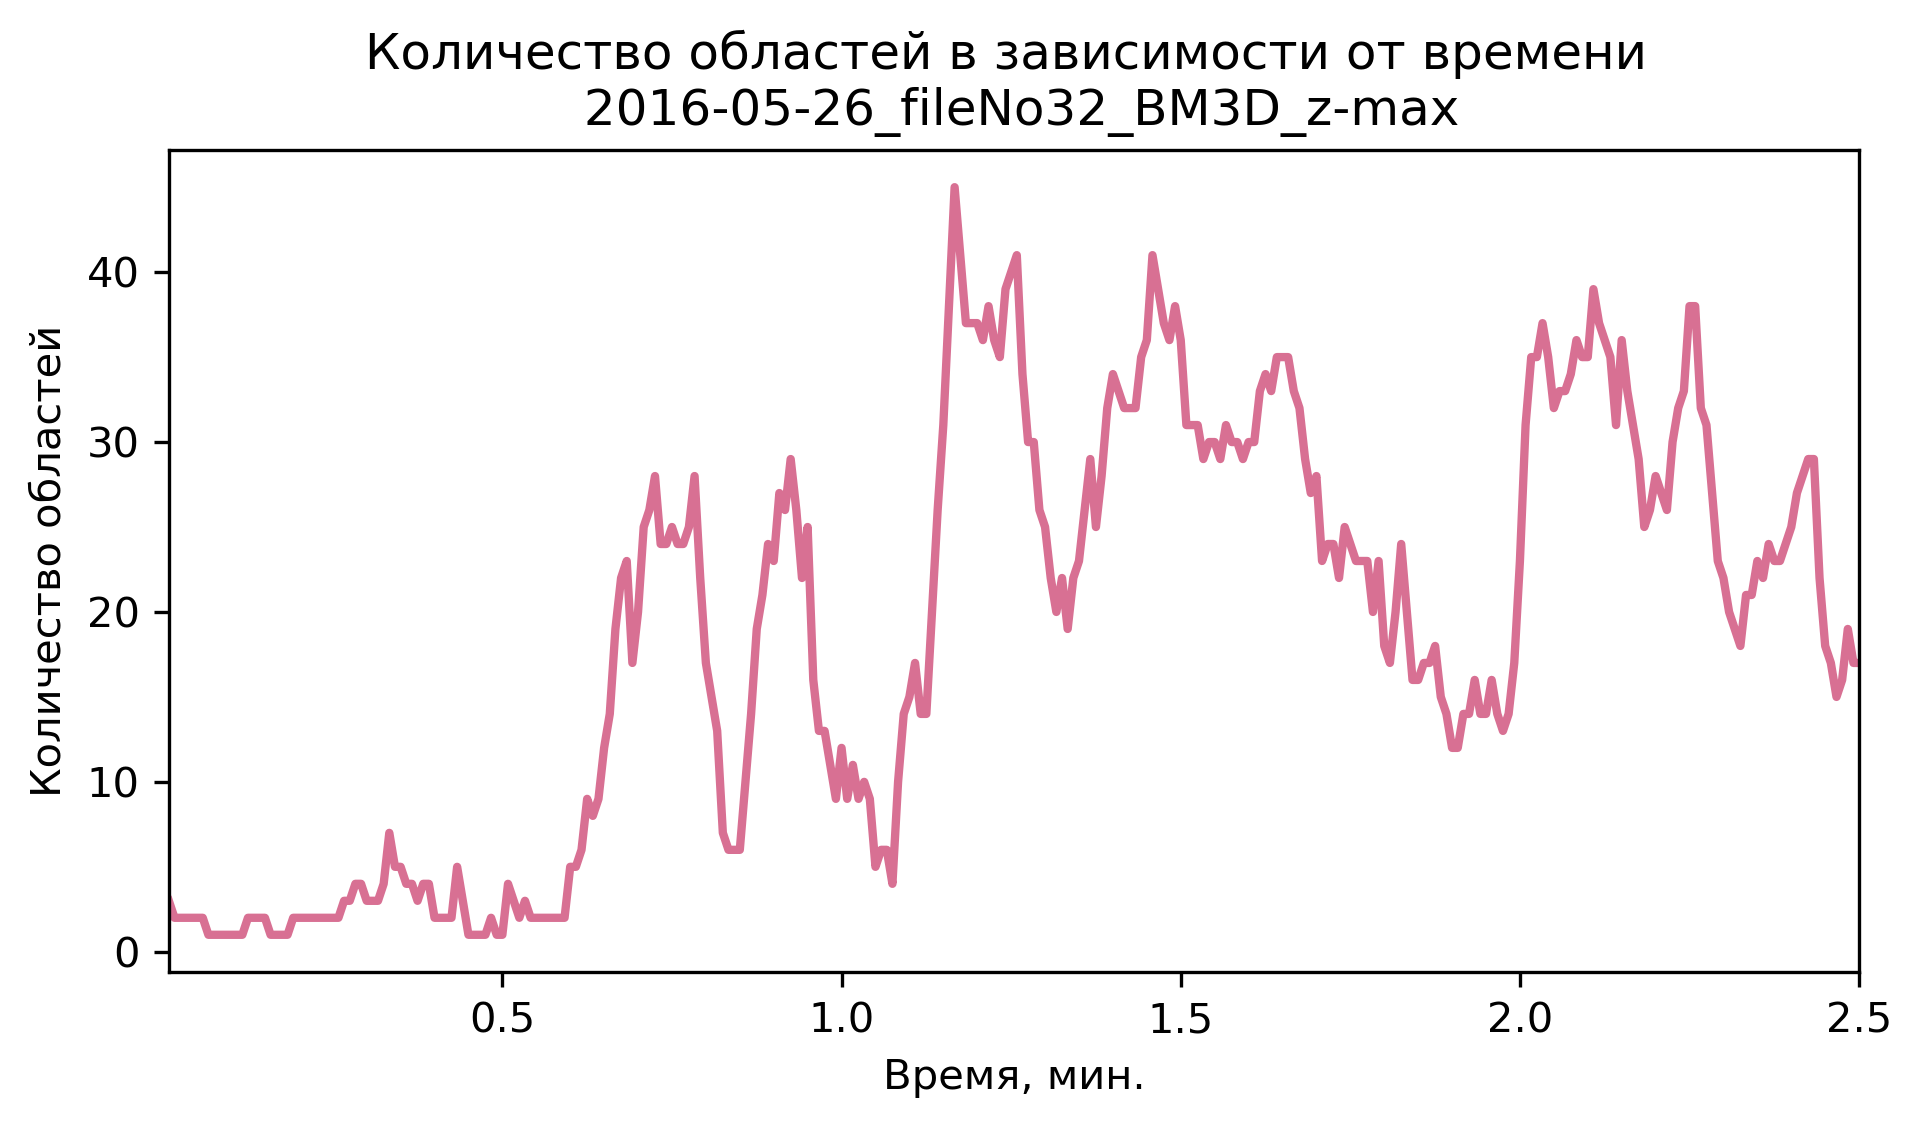

100%|██████████| 600/600 [00:06<00:00, 98.18it/s] 


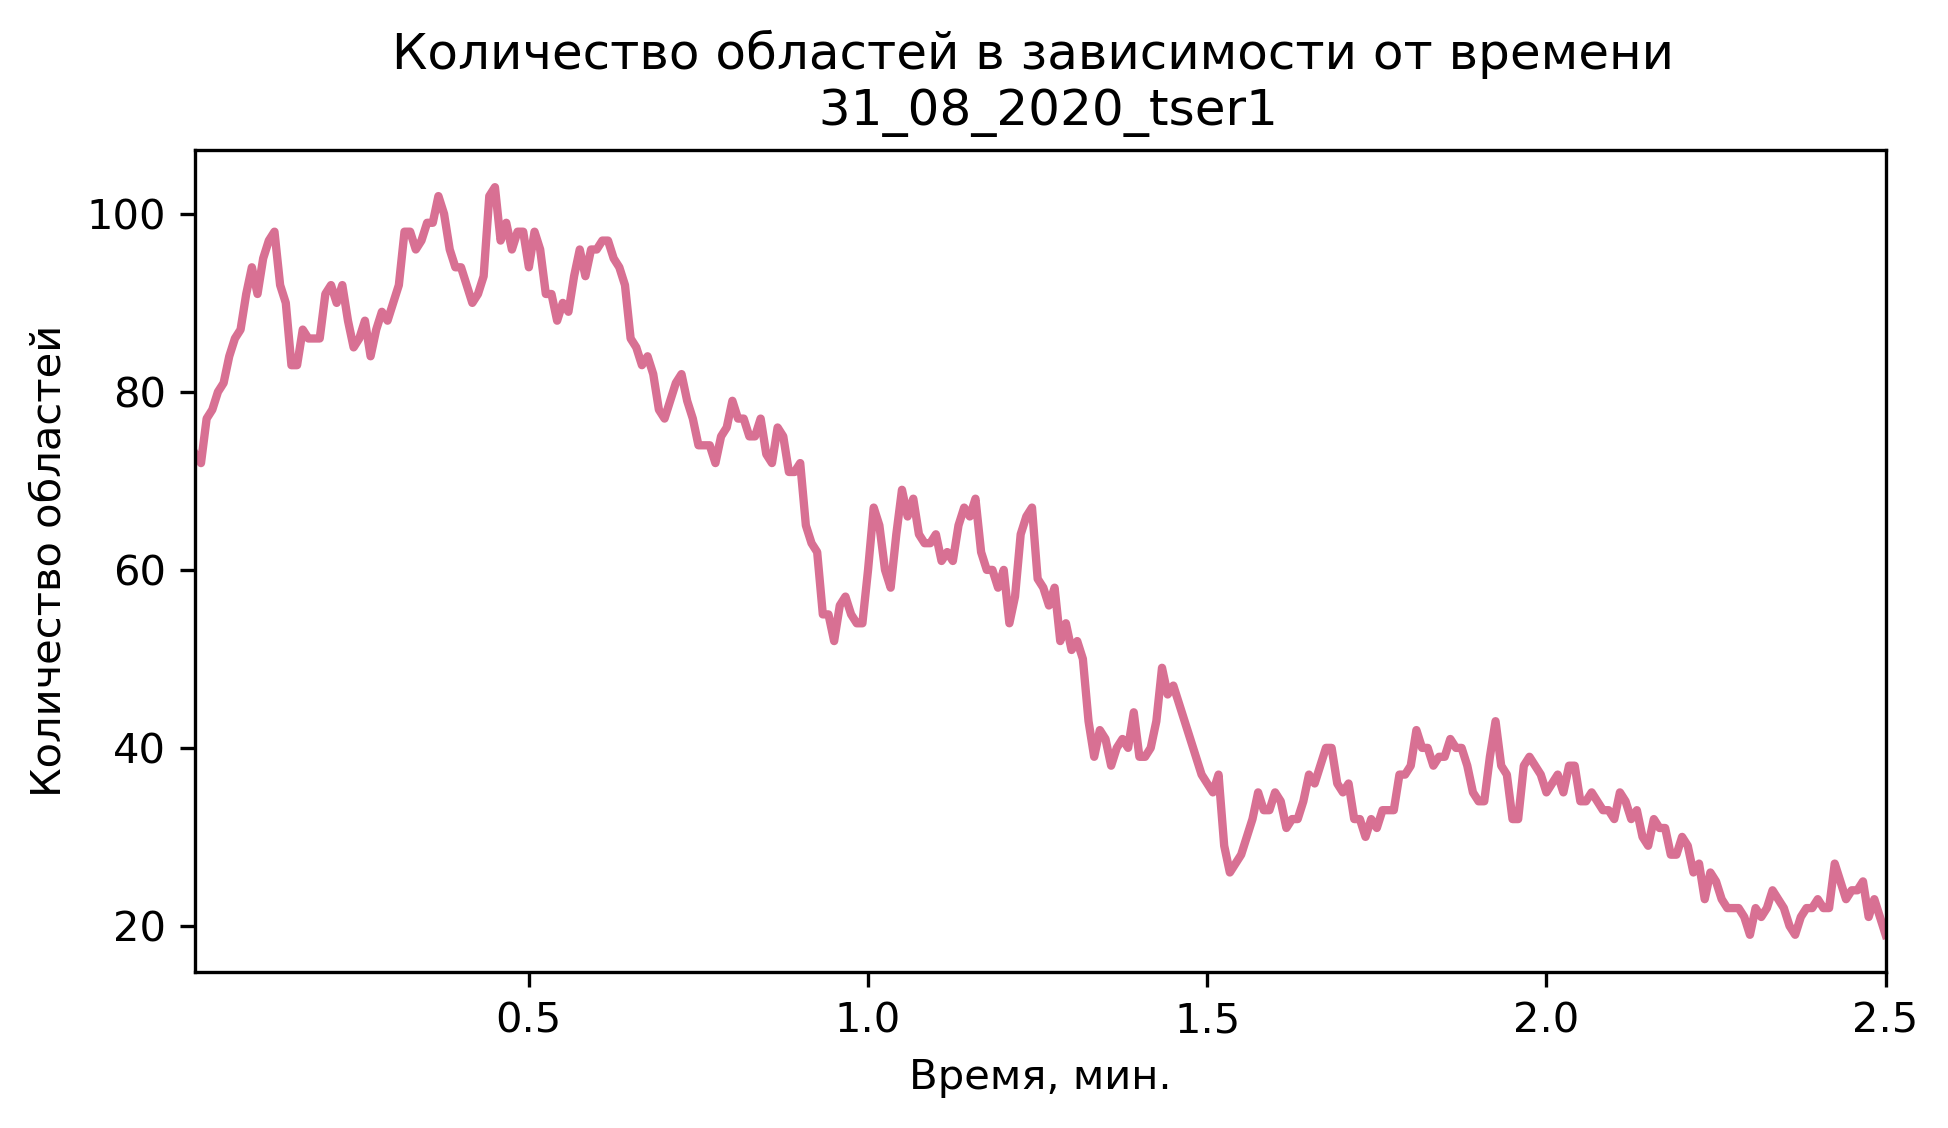

100%|██████████| 600/600 [00:04<00:00, 131.58it/s]


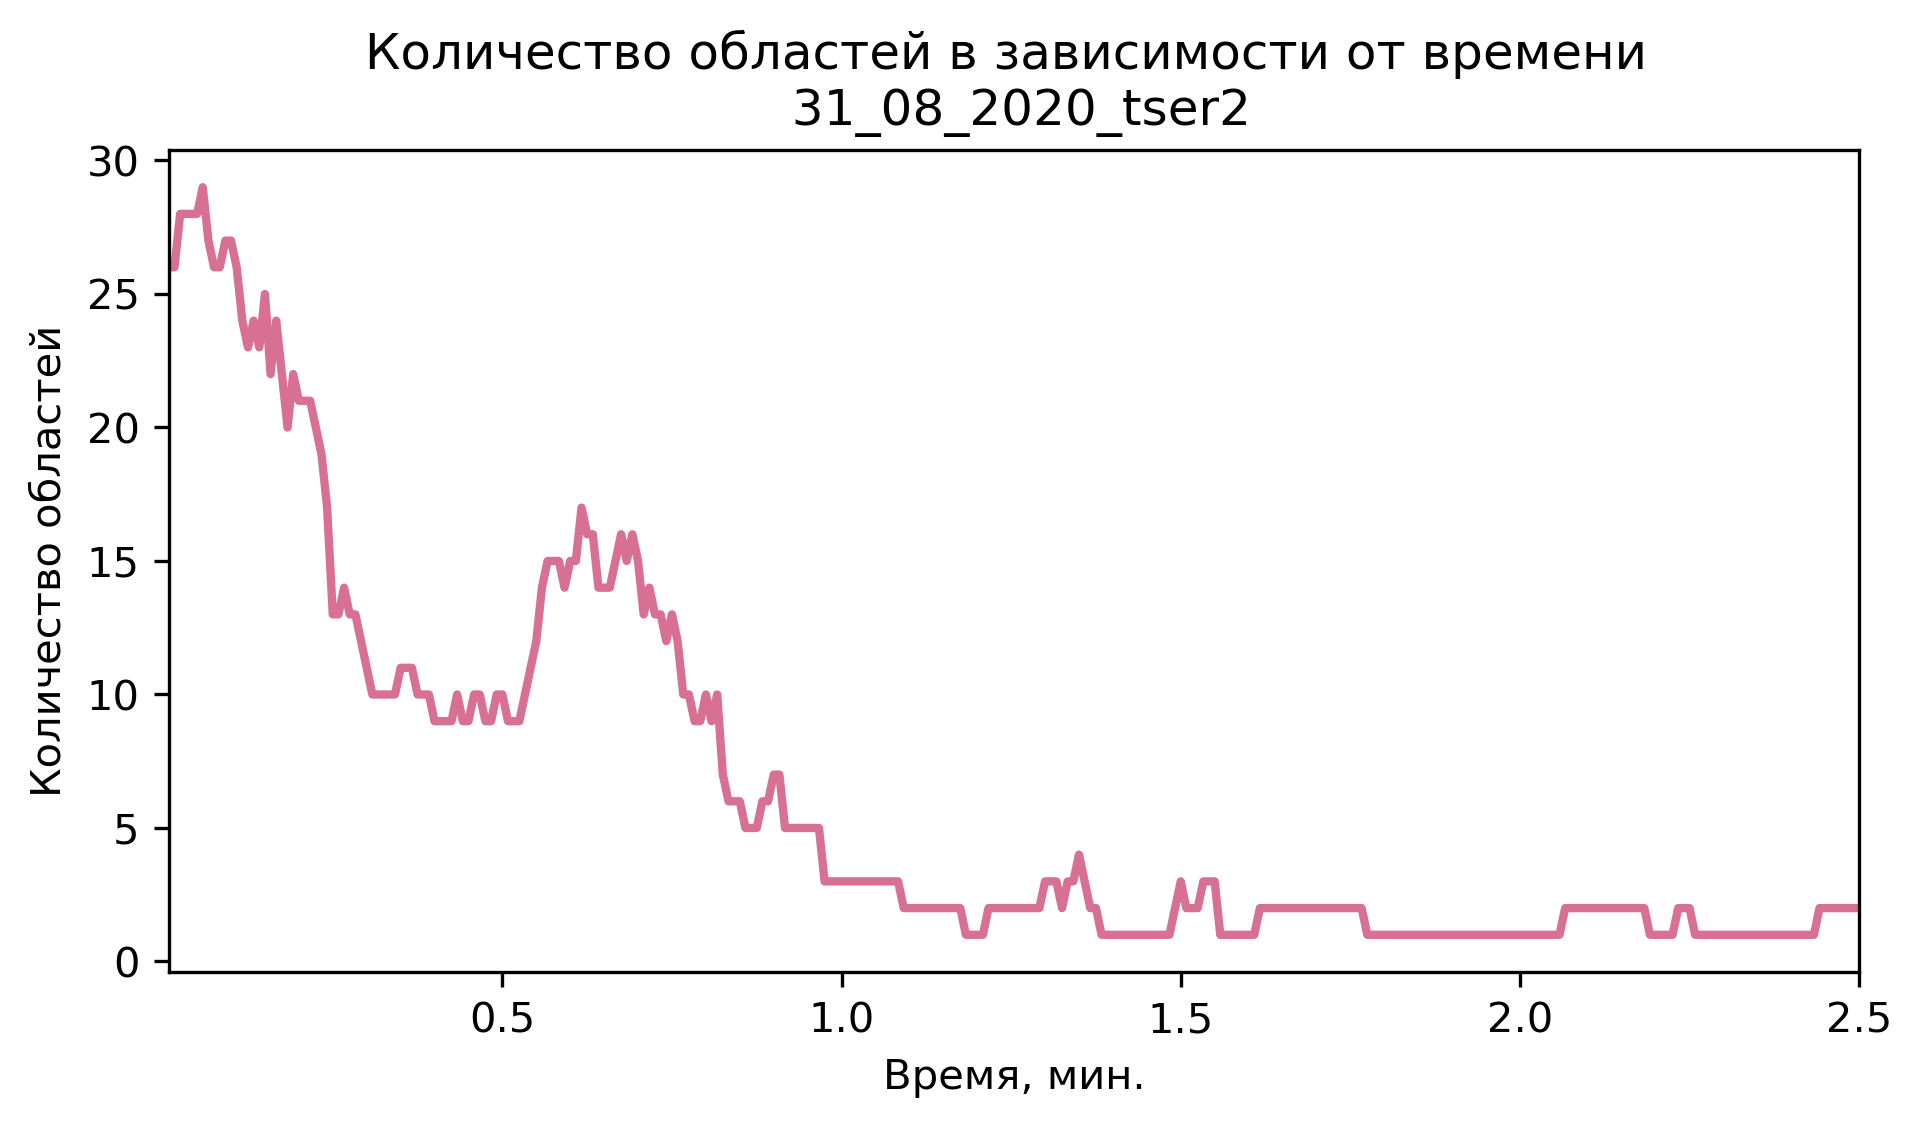

100%|██████████| 600/600 [00:02<00:00, 295.19it/s]


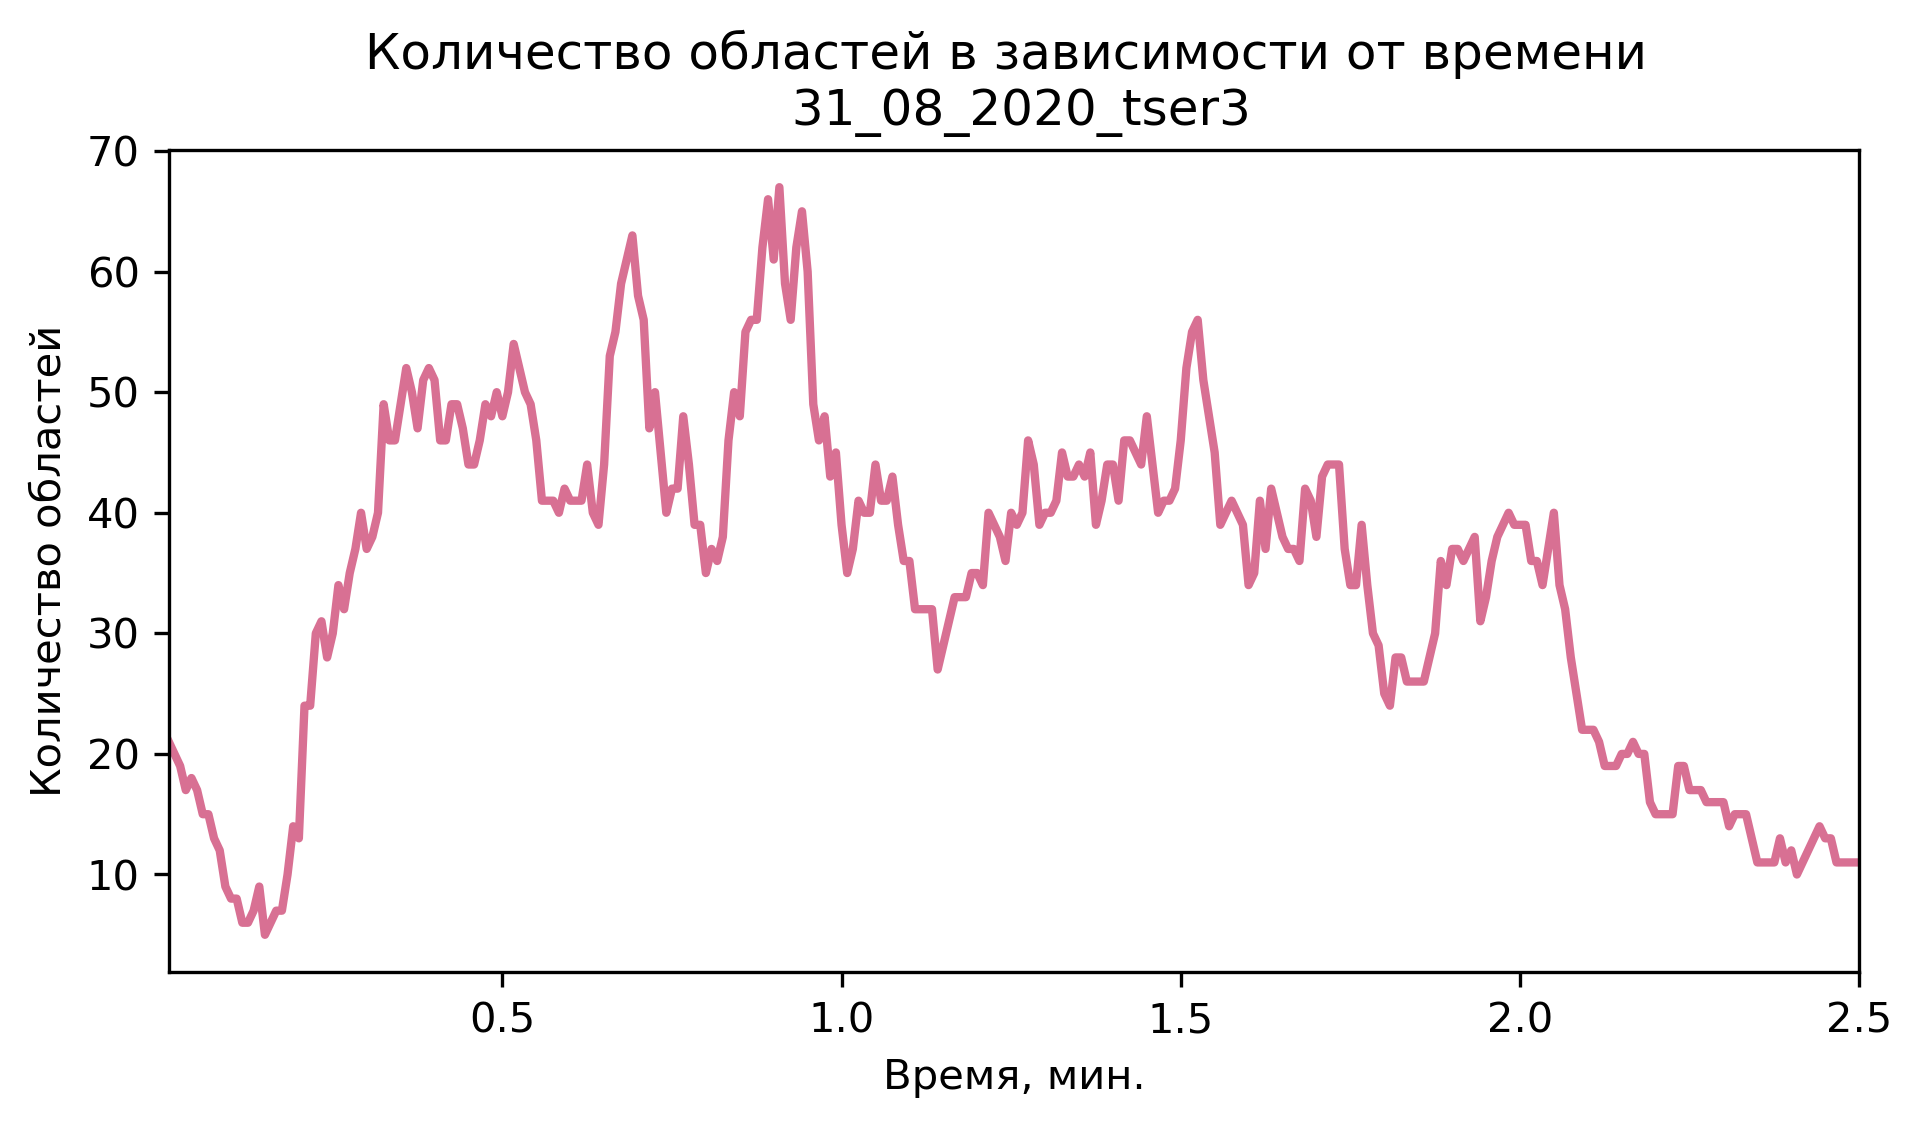

100%|██████████| 600/600 [00:04<00:00, 136.99it/s]


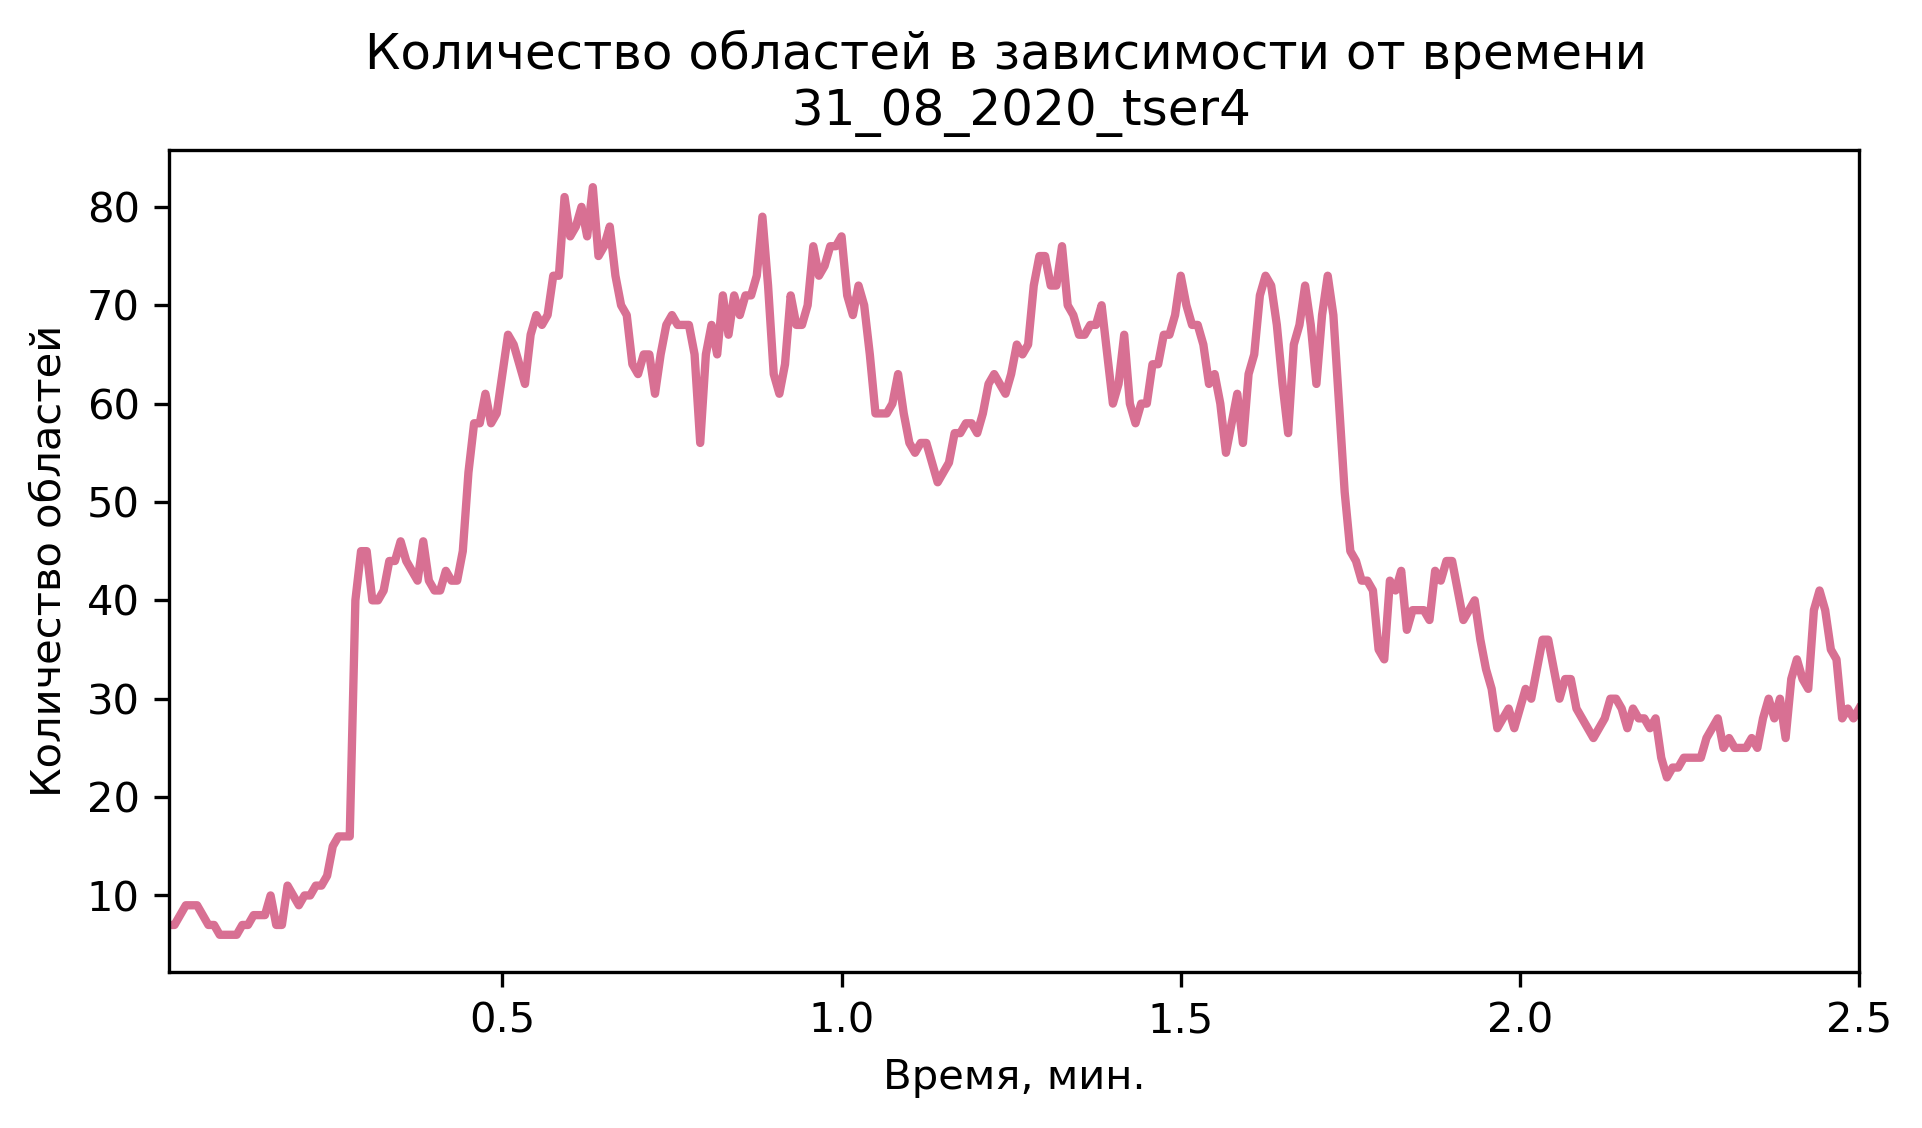

In [15]:
def build_graph(dataset_type, df_areas):    
    folder_name = Path(dataset_type).name
    fig = plt.figure(figsize=(7.27, 3.56), dpi=300)
    time = df_areas['image_index'] / 120
    areas = df_areas['area']
    x_min, x_max = time.min(), time.max()
    plt.plot(time, areas, color='#D87093', linewidth=2)
    plt.xlabel(f'Время, мин.')
    plt.ylabel('Количество областей')
    plt.title(f'Количество областей в зависимости от времени \n {folder_name}')
    plt.xlim(x_min, x_max)
    plt.show()
    return fig

data_path =  Path('C:/Users/HP/Desktop/Task_Astrocytes')
for dataset_type in find_png_files(data_path):
    df = create_df_for_dataset_type(data_path, dataset_type)
    df_areas = find_count_area(df,dataset_type)
    build_graph(dataset_type, df_areas)

  0%|          | 0/600 [00:00<?, ?it/s]

100%|██████████| 600/600 [00:05<00:00, 113.30it/s]


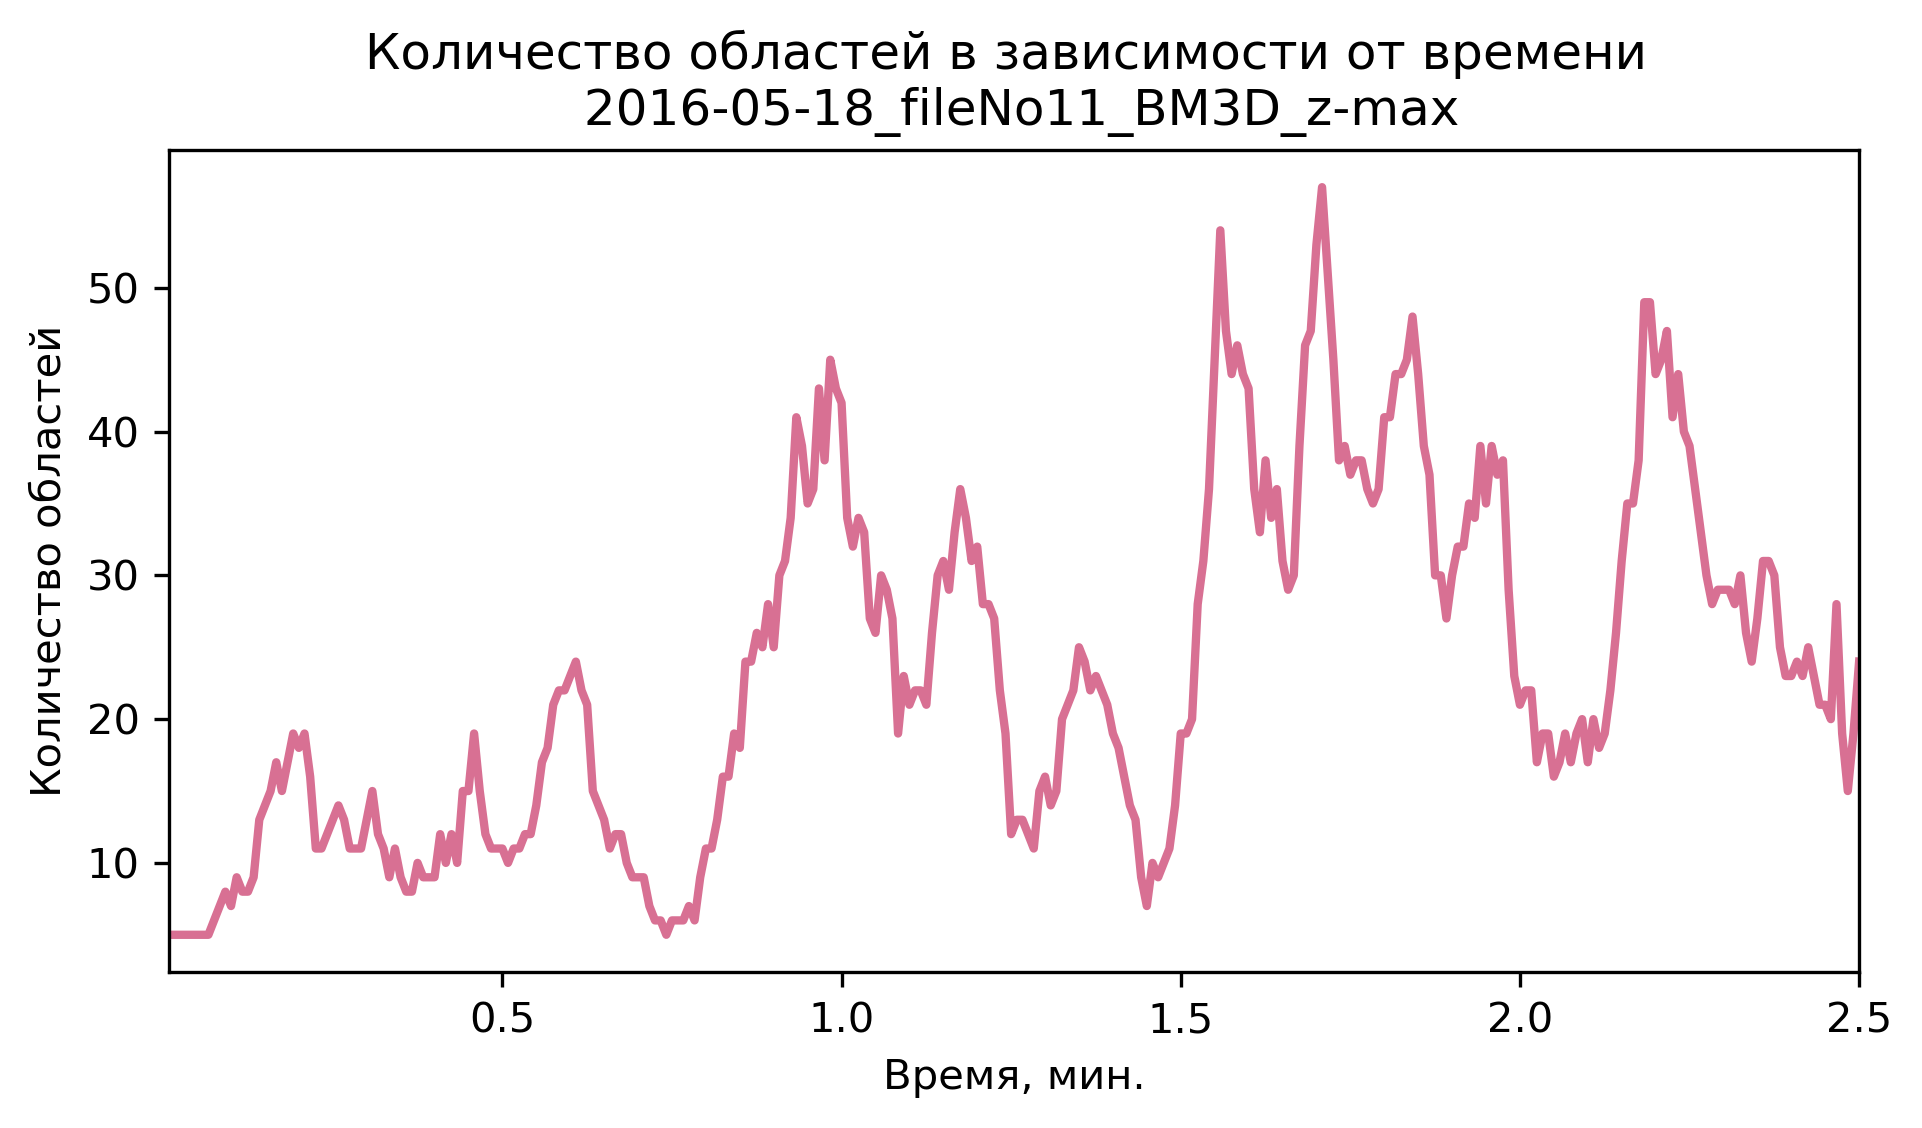

100%|██████████| 600/600 [00:01<00:00, 321.19it/s]


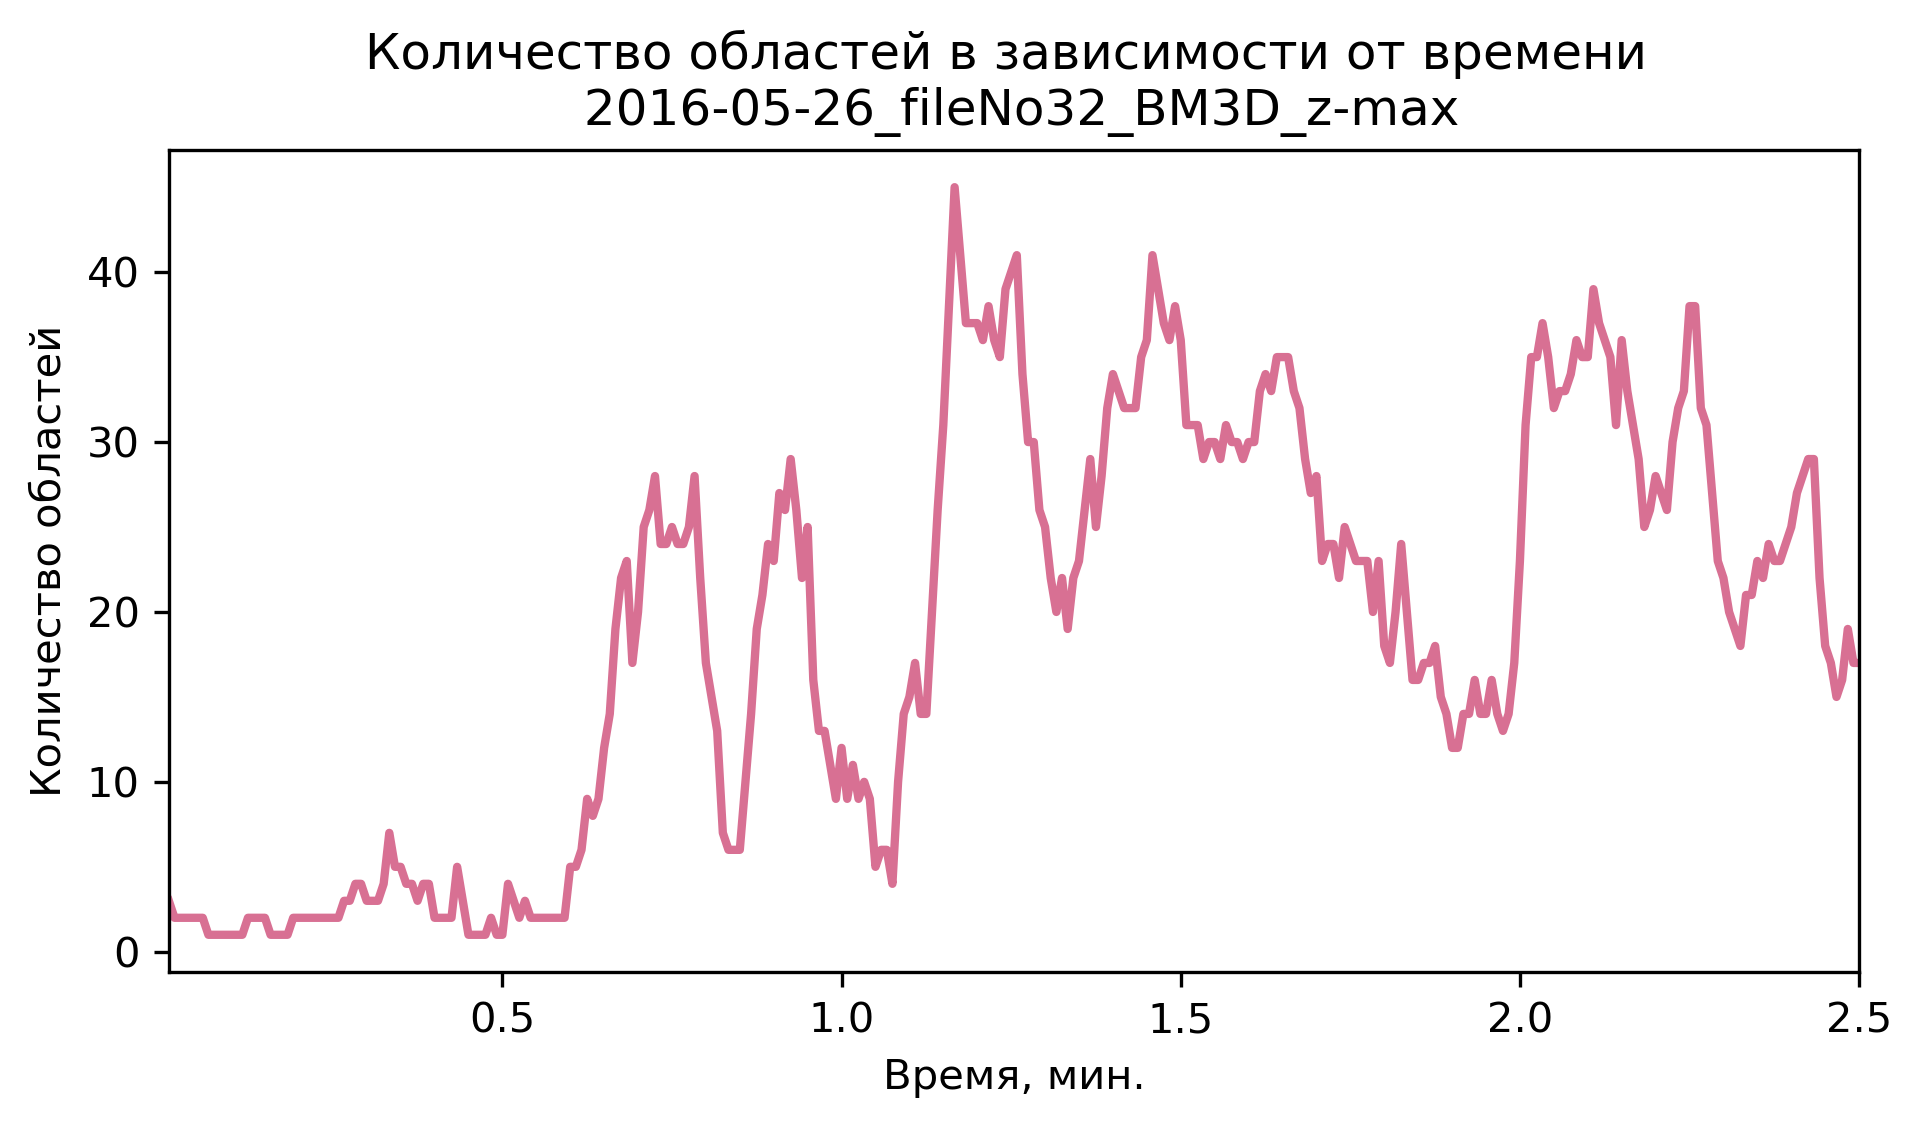

100%|██████████| 600/600 [00:03<00:00, 196.80it/s]


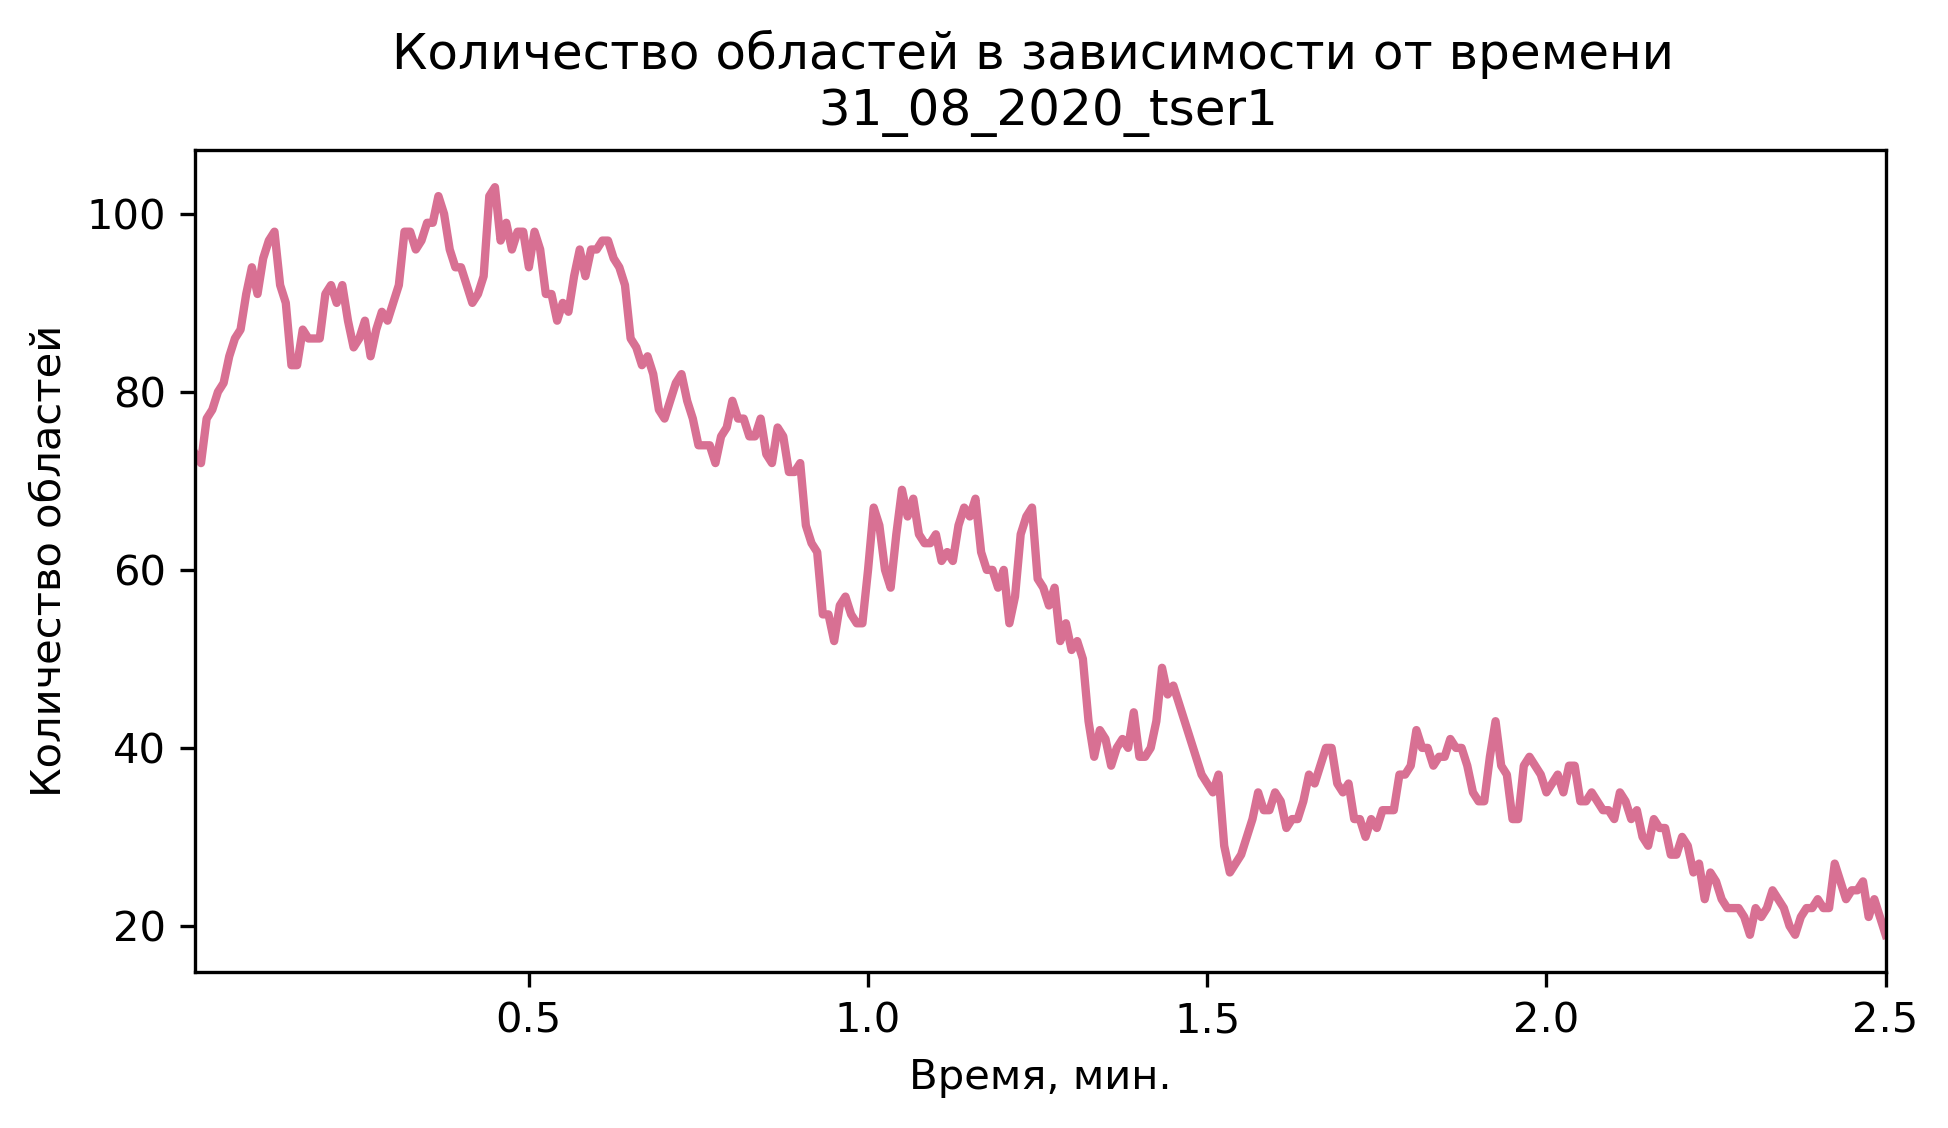

100%|██████████| 600/600 [00:03<00:00, 179.42it/s]


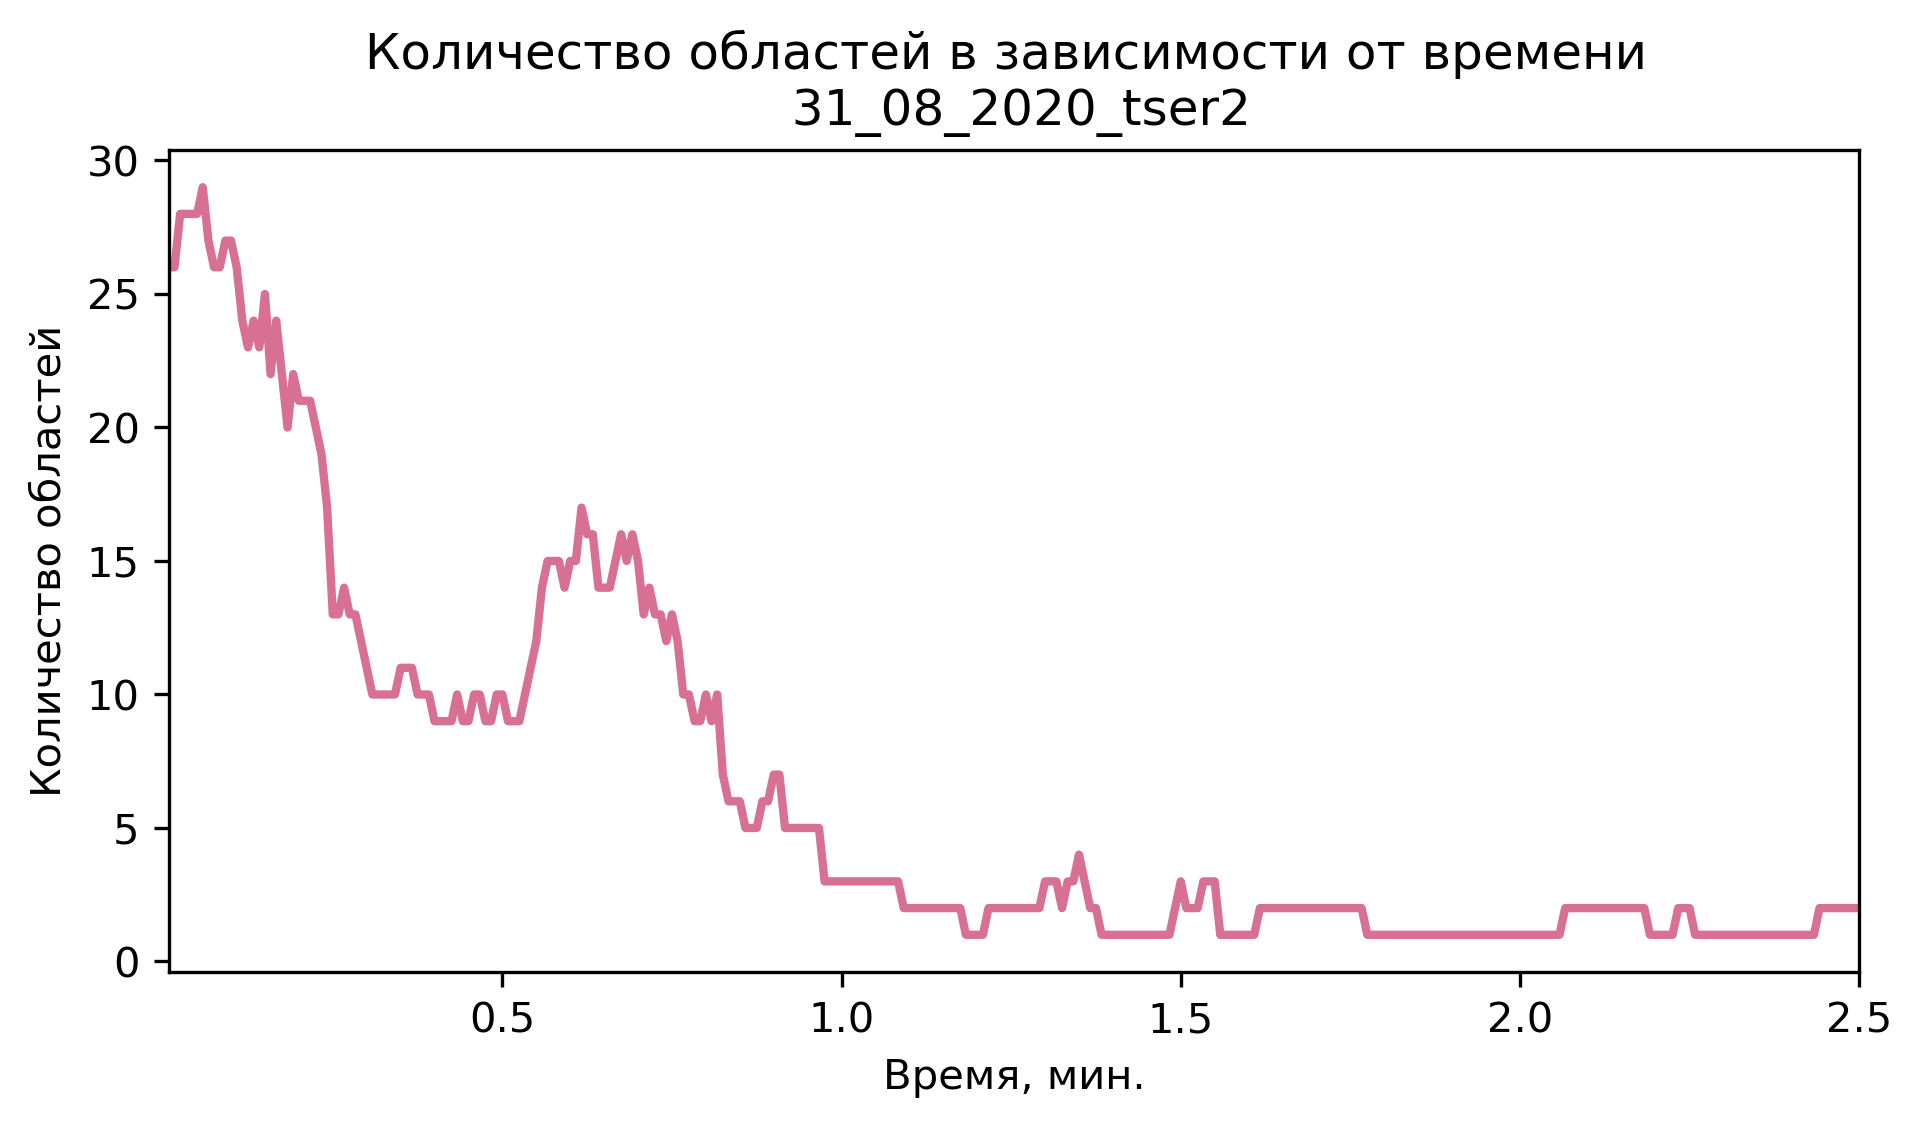

100%|██████████| 600/600 [00:02<00:00, 228.25it/s]


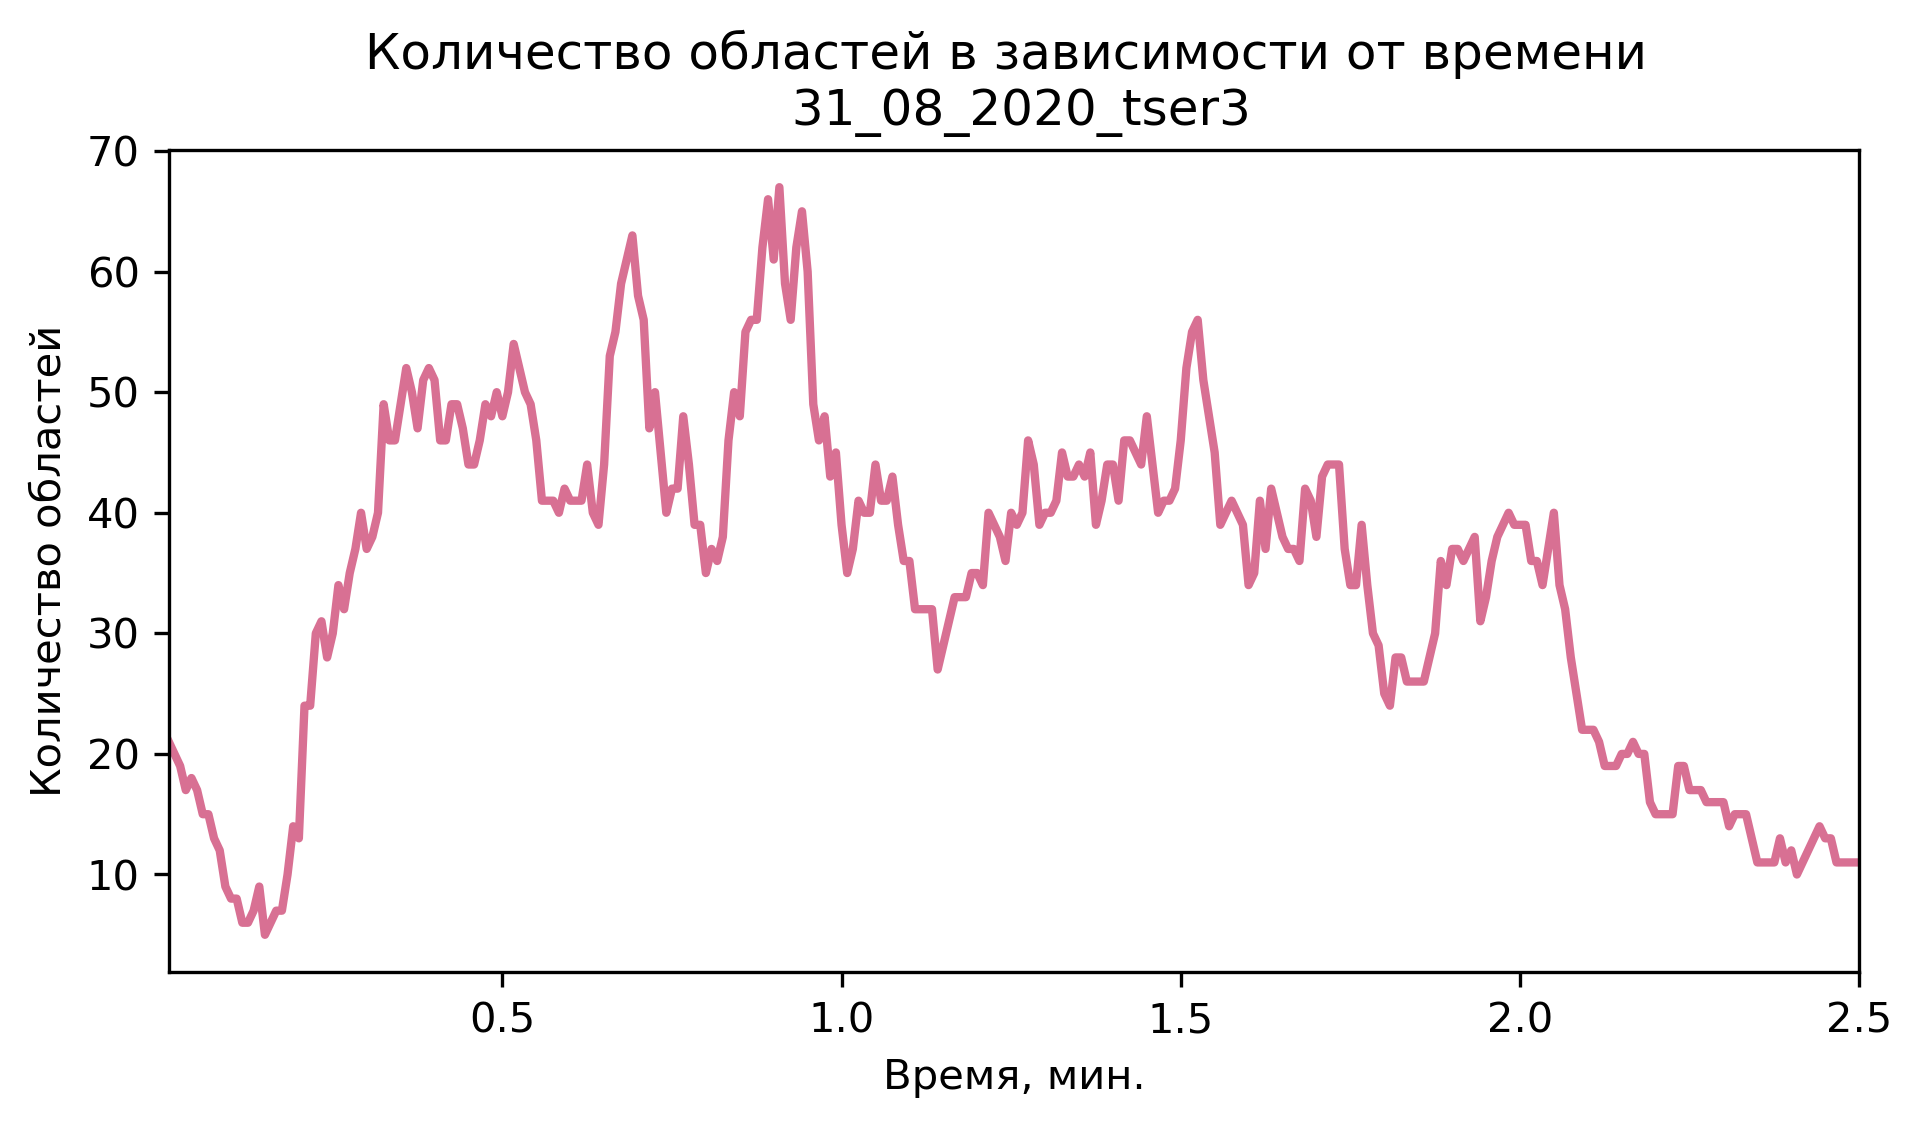

100%|██████████| 600/600 [00:04<00:00, 128.34it/s]


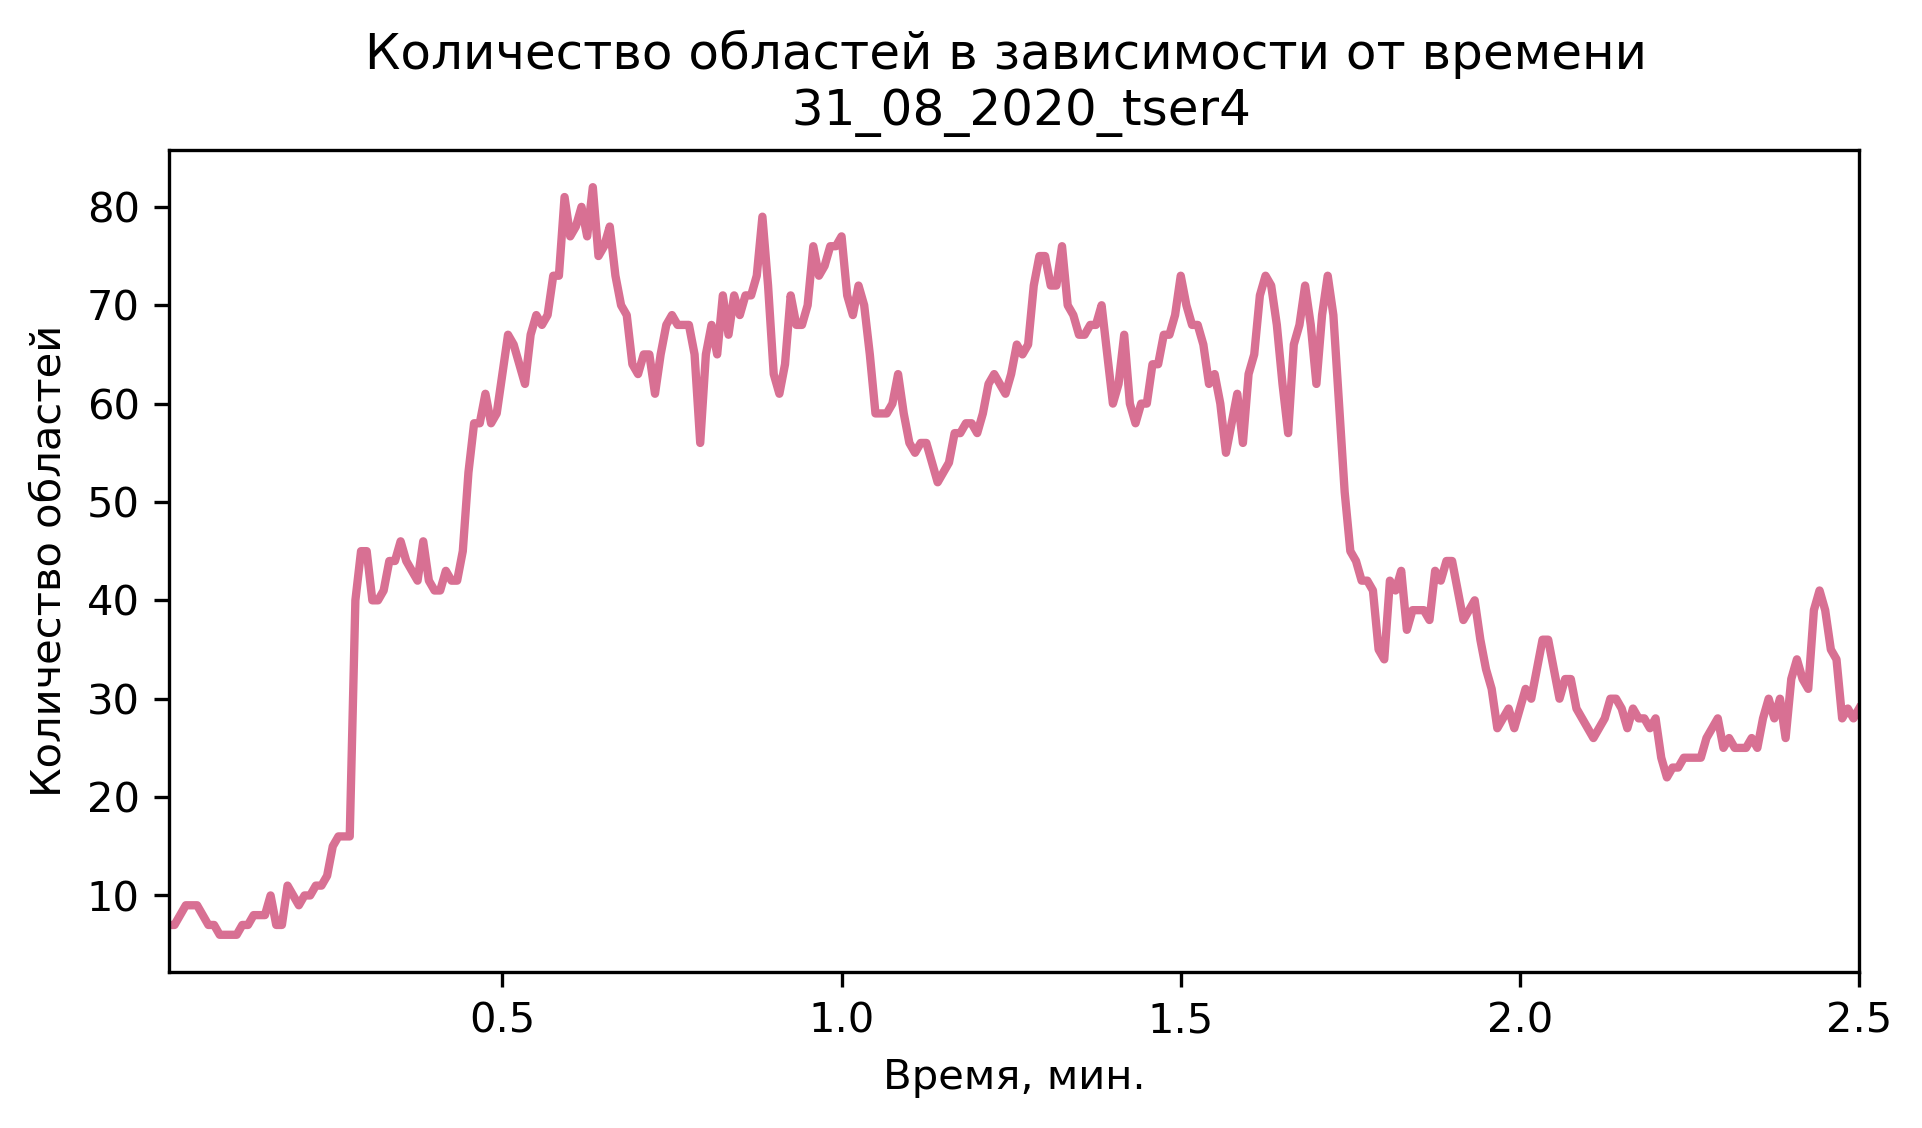

In [16]:
def save_graph(fig, dataset_type, save_path):
    folder_name = Path(dataset_type).name
    # Сохранение графика
    fig.savefig(f"{save_path}/{folder_name}.png", format='png',  bbox_inches='tight')
    fig.savefig(f"{save_path}/{folder_name}.svg", format='svg', bbox_inches='tight')
    plt.close(fig)

data_path =  Path('C:/Users/HP/Desktop/Task_Astrocytes')
save_path = Path('C:/Users/HP/Desktop/graphs') # Папка для сохранения графиков
for dataset_type in find_png_files(data_path):
    df = create_df_for_dataset_type(data_path, dataset_type)
    df_areas = find_count_area(df,dataset_type)
    fig = build_graph(dataset_type, df_areas)
    save_graph(fig, dataset_type, save_path)

100%|██████████| 600/600 [00:04<00:00, 141.64it/s]


Fire Matrix for 2016-05-18_fileNo11_BM3D_z-max


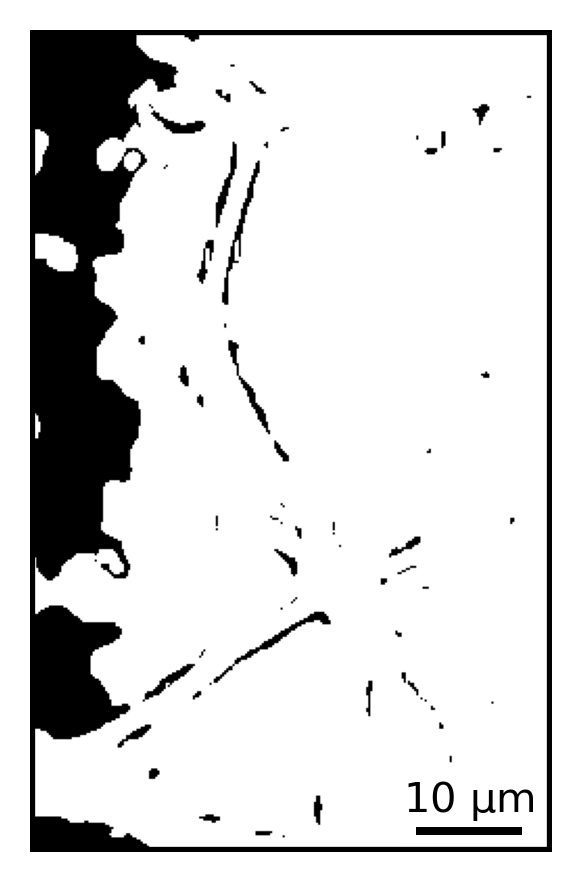

100%|██████████| 600/600 [00:02<00:00, 227.89it/s]


Fire Matrix for 2016-05-26_fileNo32_BM3D_z-max


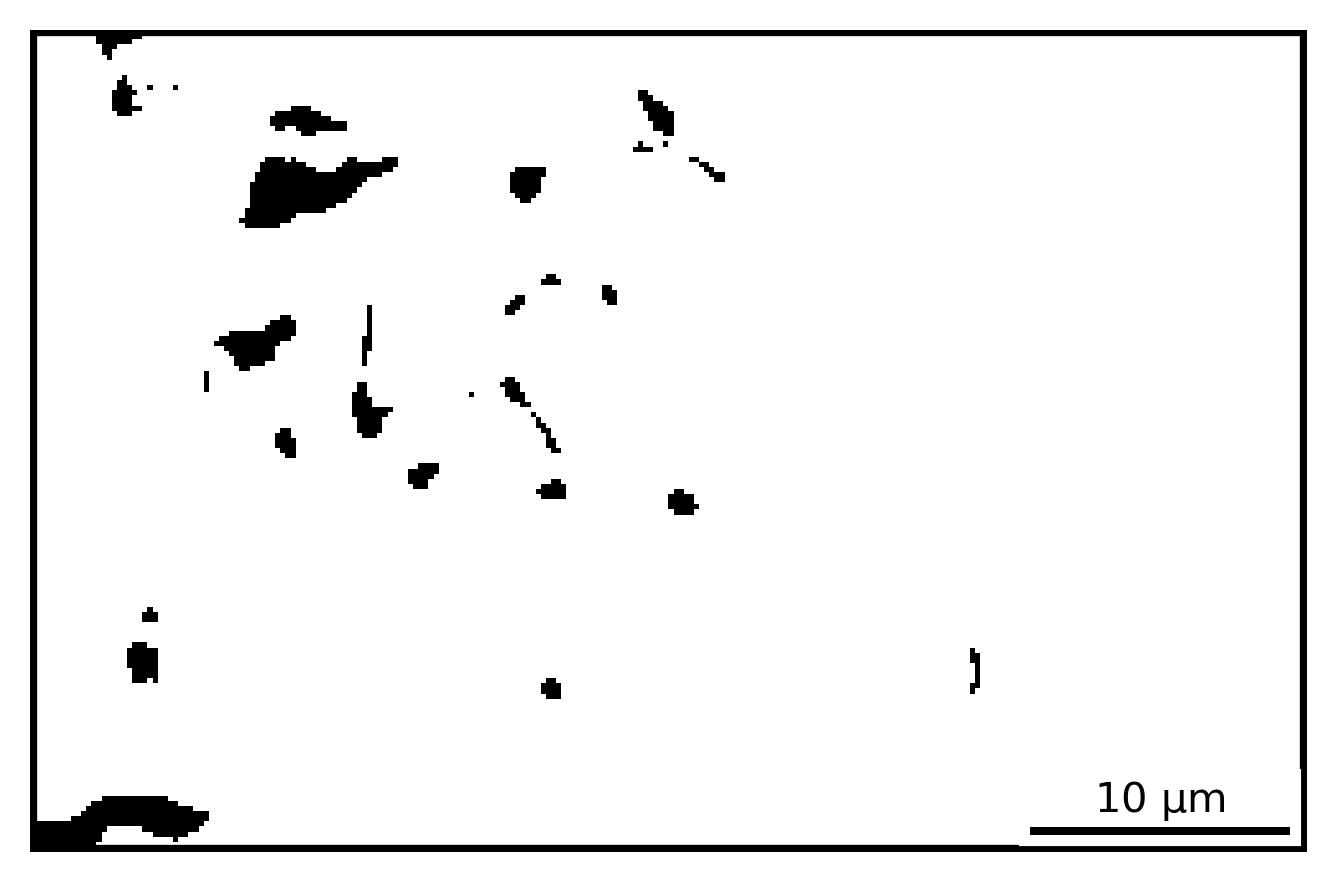

100%|██████████| 600/600 [00:04<00:00, 126.14it/s]


Fire Matrix for 31_08_2020_tser1


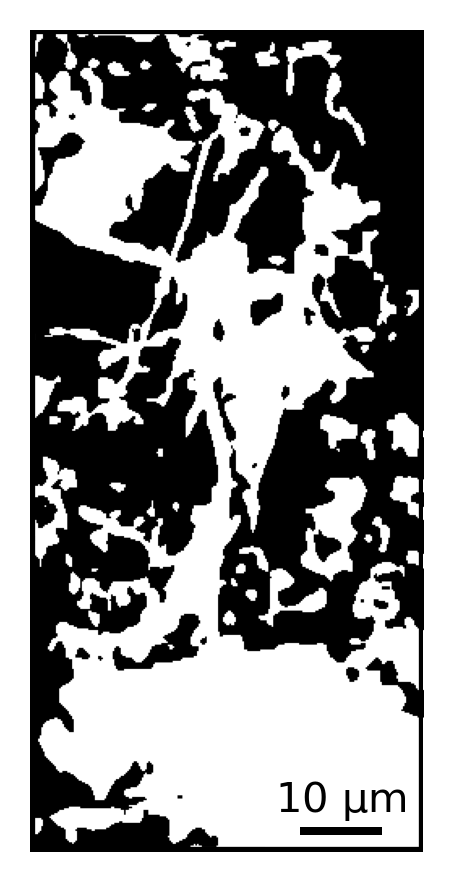

100%|██████████| 600/600 [00:05<00:00, 112.49it/s]


Fire Matrix for 31_08_2020_tser2


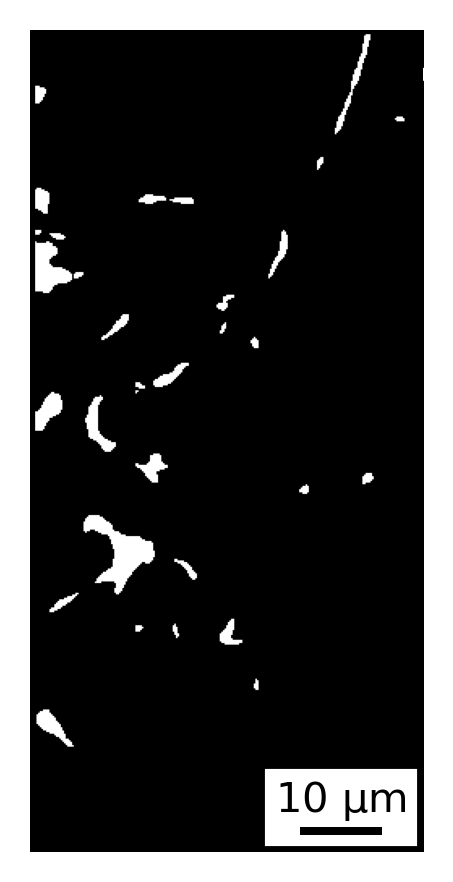

100%|██████████| 600/600 [00:03<00:00, 196.90it/s]


Fire Matrix for 31_08_2020_tser3


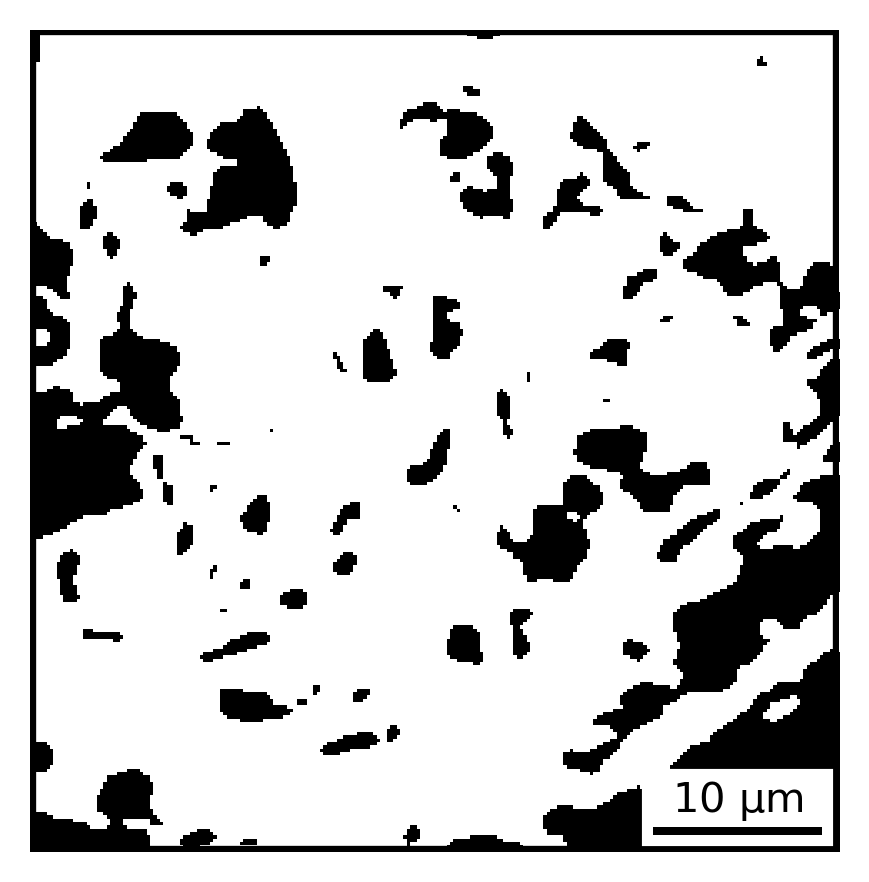

100%|██████████| 600/600 [00:04<00:00, 126.94it/s]


Fire Matrix for 31_08_2020_tser4


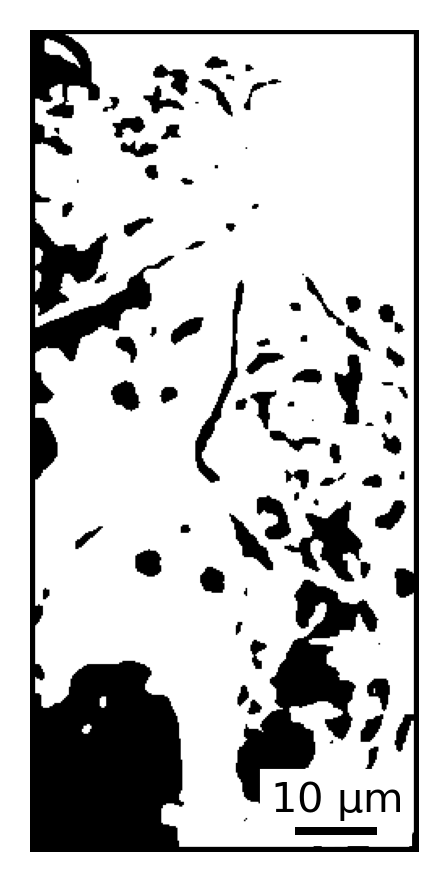

In [17]:
from matplotlib_scalebar.scalebar import ScaleBar
from matplotlib.patches import Rectangle
import matplotlib.patches as patches
def calculate_fire_matrix_from_binary_images( df):
    df_type = df[df['status'] == 'events']
    images_array = []
    for index, row in df_type.iterrows():
        image_path = row['file_path']
        image = cv2.imread(str(image_path), cv2.IMREAD_GRAYSCALE)
        image_array = np.array(image)
        images_array.append(image_array)
    fire_matrix = np.zeros_like(images_array[0])
    for image in images_array: 
        fire_matrix = np.maximum(fire_matrix, image)
    return fire_matrix


def build_matrix(dataset_type, fire_matrix):
    folder_name = Path(dataset_type).name
    fig, ax = plt.subplots(figsize=(7.27, 3.56), dpi=300)
    print(f'Fire Matrix for {folder_name}')
    ax.imshow(fire_matrix, cmap='gray') 
    ax.axis('off')

    rows, cols = fire_matrix.shape  # Добавление рамки
    border_color = 'black'  
    border_width = 2     
    rect = patches.Rectangle((0, 0), cols-1, rows-1, linewidth=border_width, edgecolor=border_color, facecolor='none')
    ax.add_patch(rect)
    scalebar = ScaleBar(dx = 0.196,units = "um",location='lower right', scale_loc="top", border_pad=0.2,sep=1, length_fraction = 0.3)  # Шкала в 10 мм
    ax.add_artist(scalebar)
    plt.show()
    return fig

data_path =  Path('C:/Users/HP/Desktop/Task_Astrocytes')
for dataset_type in find_png_files(data_path):
    df = create_df_for_dataset_type(data_path, dataset_type)
    fire_matrix = calculate_fire_matrix_from_binary_images(df)
    build_matrix(dataset_type, fire_matrix)

100%|██████████| 600/600 [00:05<00:00, 116.12it/s]


Fire Matrix for 2016-05-18_fileNo11_BM3D_z-max


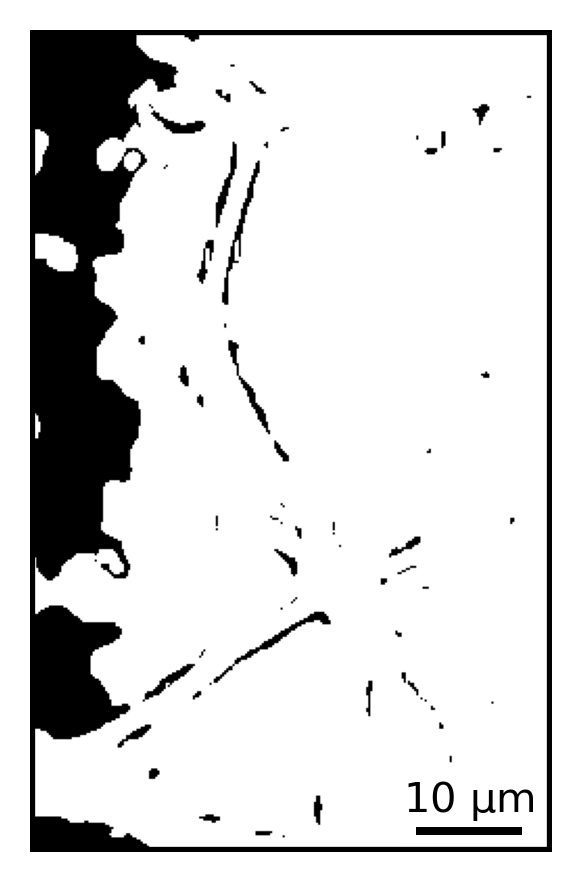

100%|██████████| 600/600 [00:02<00:00, 245.17it/s]


Fire Matrix for 2016-05-26_fileNo32_BM3D_z-max


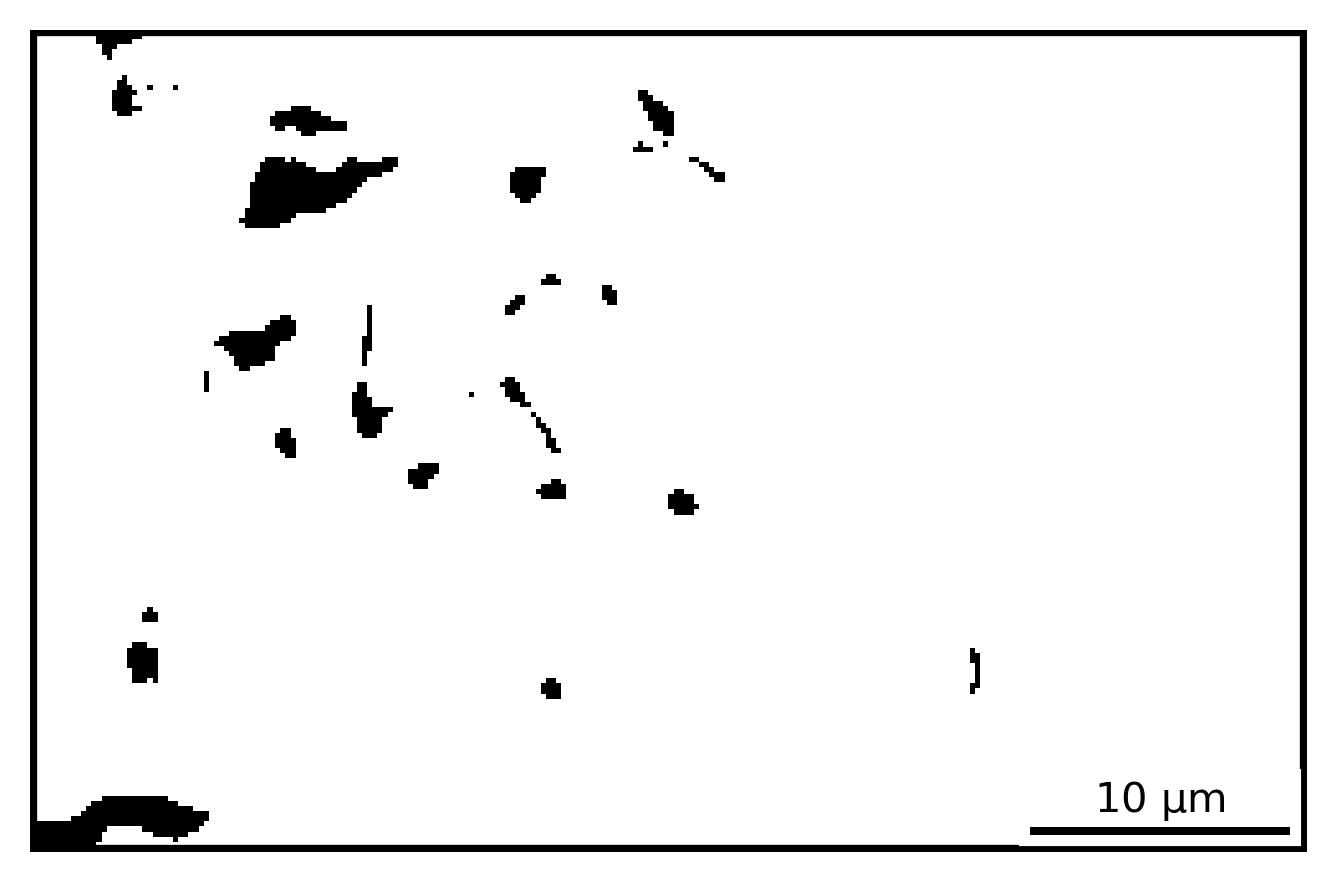

100%|██████████| 600/600 [00:04<00:00, 145.29it/s]


Fire Matrix for 31_08_2020_tser1


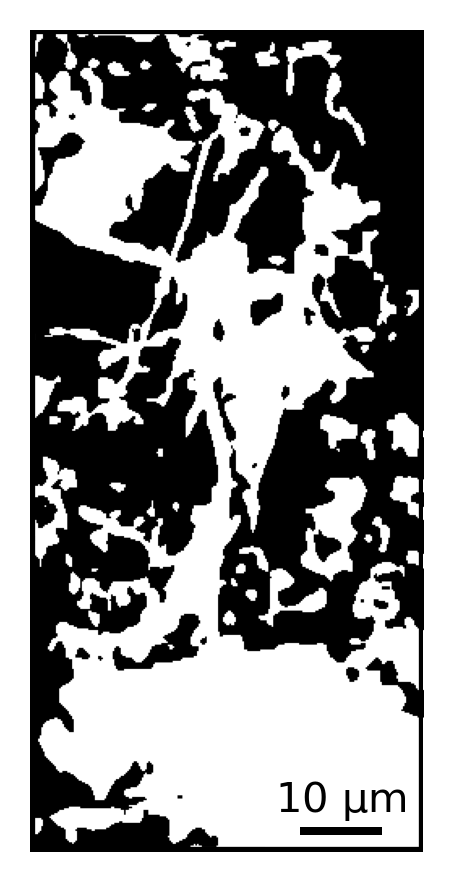

100%|██████████| 600/600 [00:04<00:00, 136.32it/s]


Fire Matrix for 31_08_2020_tser2


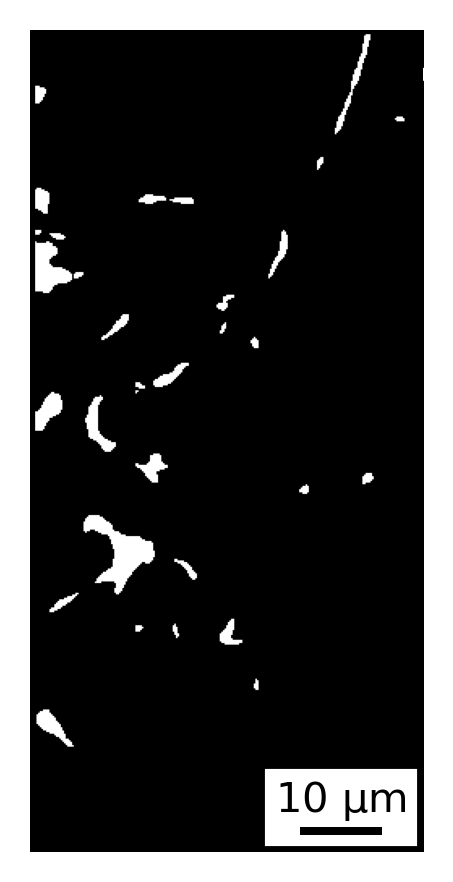

100%|██████████| 600/600 [00:02<00:00, 247.24it/s]


Fire Matrix for 31_08_2020_tser3


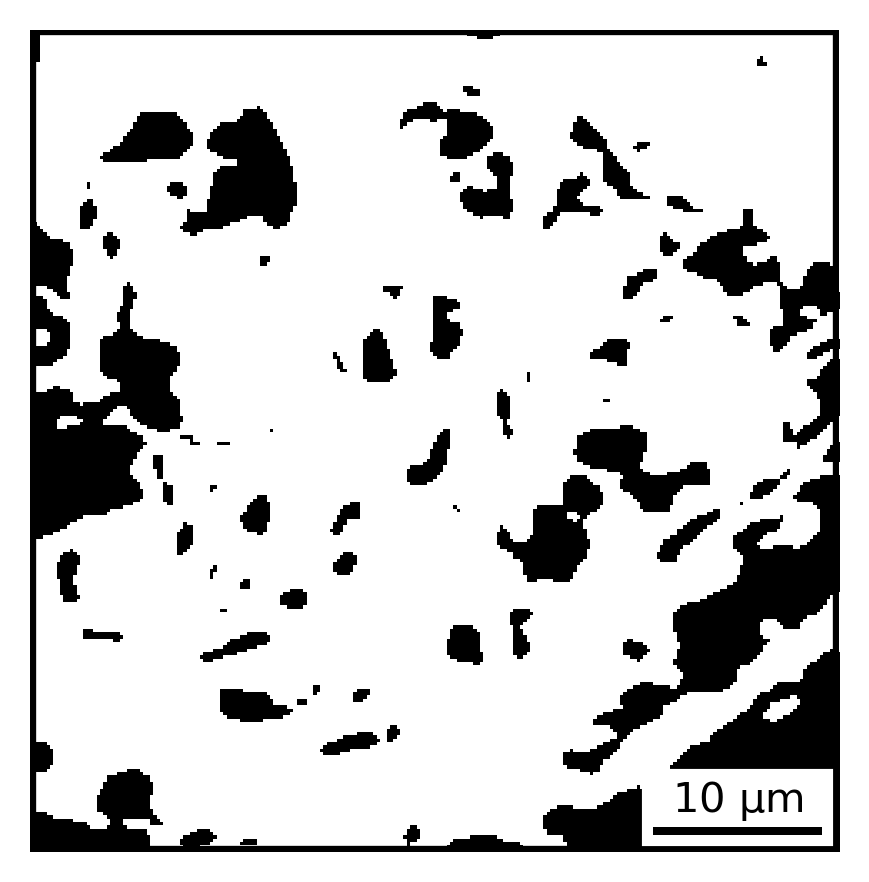

100%|██████████| 600/600 [00:04<00:00, 146.60it/s]


Fire Matrix for 31_08_2020_tser4


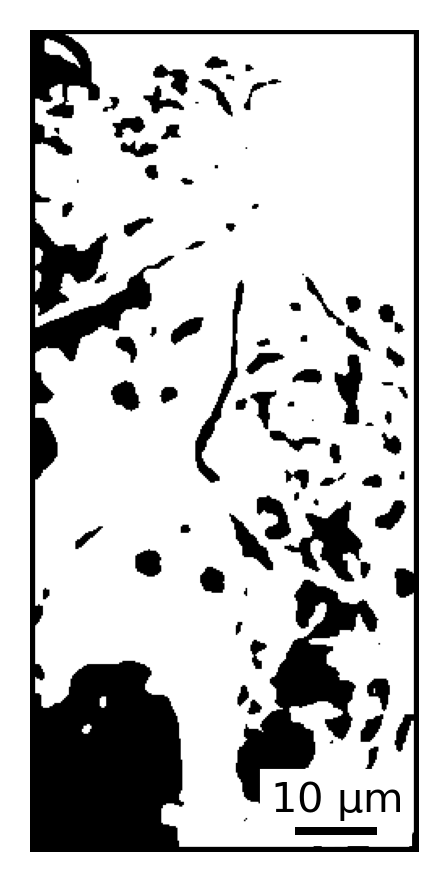

In [18]:
def save_matrix(fig, dataset_type, save_path):
    folder_name = Path(dataset_type).name
    fig.savefig(f"{save_path}/{folder_name}.png", format='png',  bbox_inches='tight')
    fig.savefig(f"{save_path}/{folder_name}.svg", format='svg',  bbox_inches='tight')
    plt.close(fig)

data_path =  Path('C:/Users/HP/Desktop/Task_Astrocytes')
save_path = Path(r'C:\Users\HP\Desktop\graphs1')


for dataset_type in find_png_files(data_path):
    df = create_df_for_dataset_type(data_path, dataset_type)
    fire_matrix = calculate_fire_matrix_from_binary_images(df)
    fig  = build_matrix(dataset_type,fire_matrix)    
    save_matrix(fig, dataset_type, save_path)

100%|██████████| 600/600 [00:03<00:00, 198.29it/s]


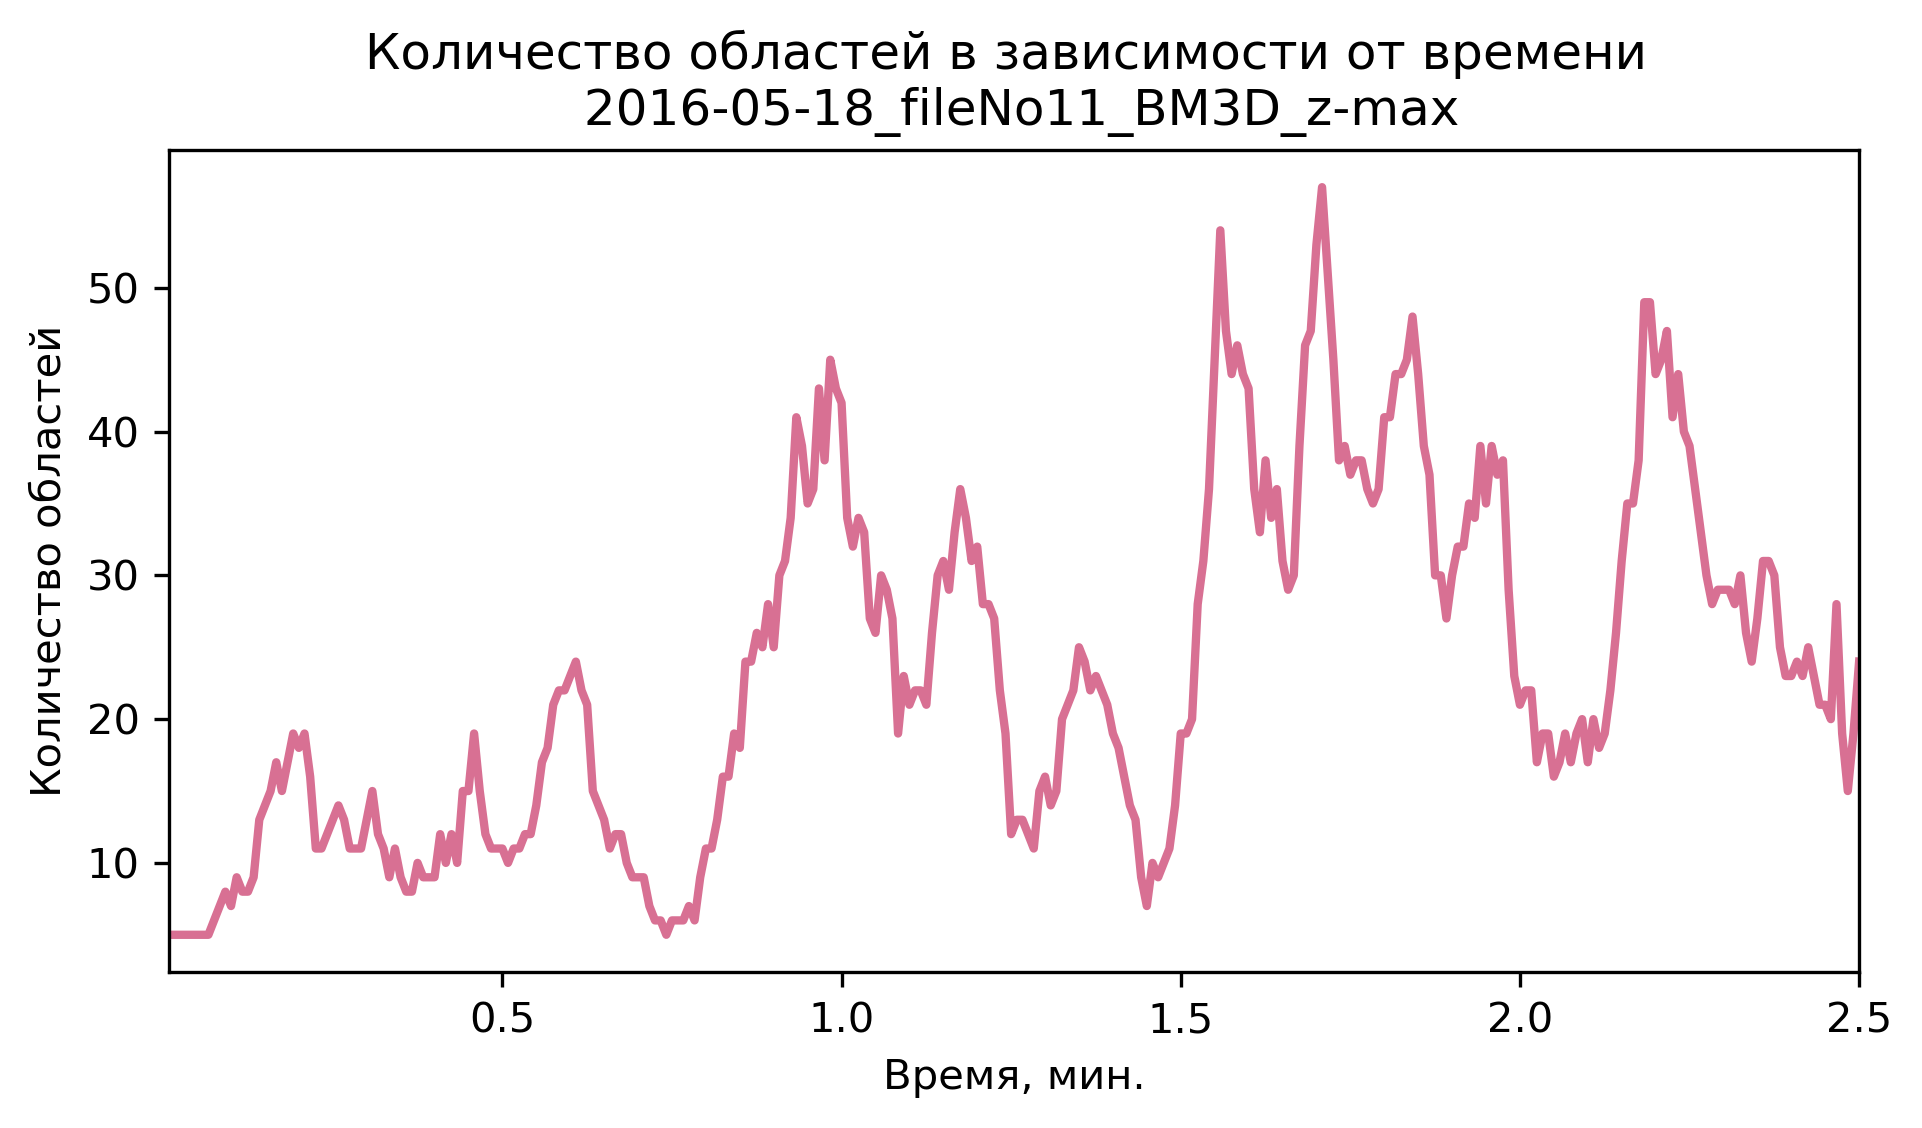

In [21]:
import pandas as pd
from pathlib import Path

def analysis(data_path, save_path):
    """Анализирует данные, строит графики, матрицу и сохраняет результаты.

    Args:
        data_path (Path): Путь к директории с данными.
        save_path (Path): Путь к директории для сохранения результатов.

    Returns:
        pd.DataFrame: DataFrame с результатами.
    """
    all = []


    for dataset_path in Path(data_path).iterdir():
        dataset_type = dataset_path.name
        df = create_df_for_dataset_type(data_path, dataset_type)
        df_areas = find_count_area(df, dataset_type)
        fire_matrix = calculate_fire_matrix_from_binary_images(df)

        fig_graph = build_graph(dataset_type, df_areas)
        save_graph(fig_graph, dataset_type, save_path)

        fig_matrix = build_matrix(dataset_type, fire_matrix)
        save_matrix(fig_matrix, dataset_type, save_path)

        df_areas['video'] = dataset_type
        df_areas['time'] = df_areas['image_index'] / 120
        all.append(df_areas)
    df_areas = pd.concat(all, ignore_index=True)
    df_areas.to_excel(save_path / 'graphs2.xlsx', index=True)
    return df_areas


data_path = Path('C:/Users/HP/Desktop/Task_Astrocytes')
save_path = Path(r'C:\Users\HP\Desktop\graphs2') 

result_df = analysis(data_path, save_path)


[Ссылка на пакет](https://cloud.unn.ru/s/JsrG5LHJwtEGC7Z)

100%|██████████| 600/600 [00:04<00:00, 126.88it/s]


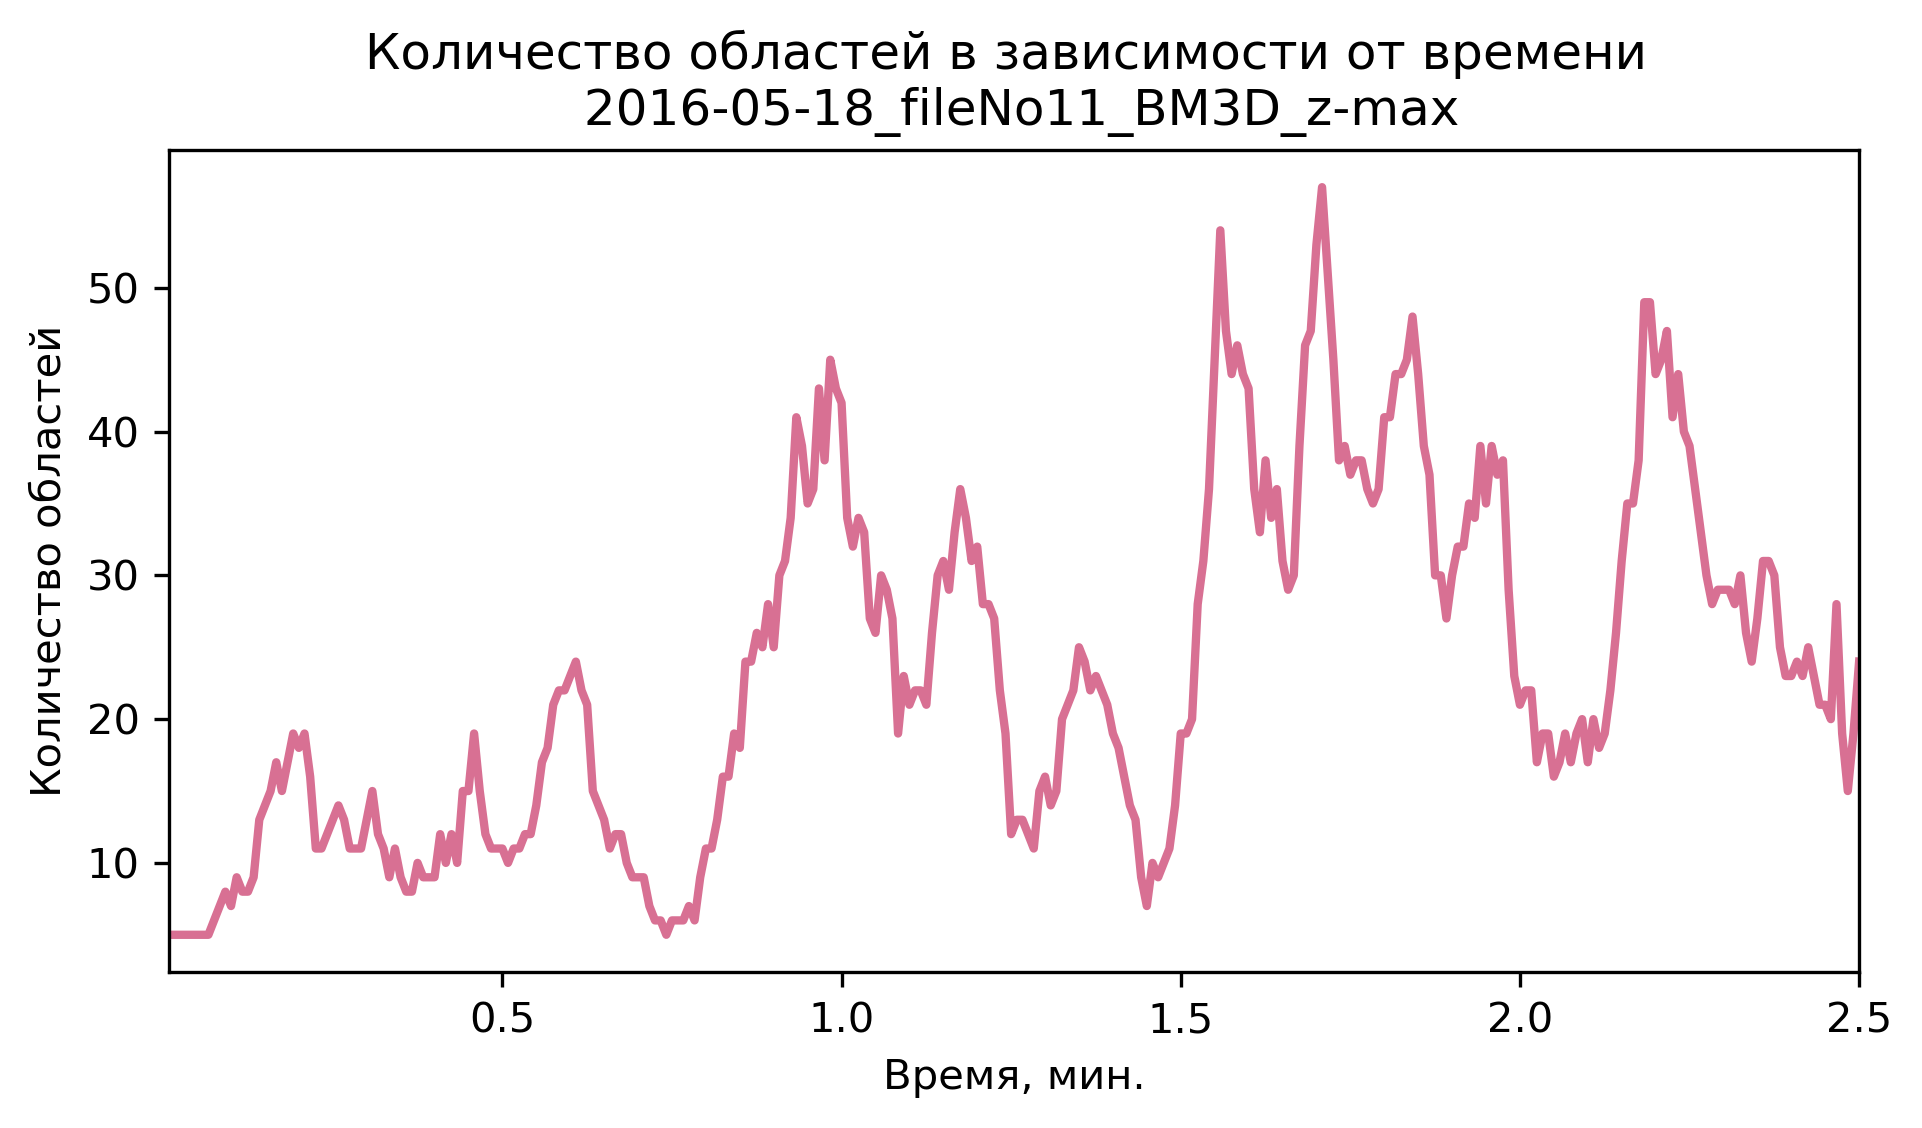

Fire Matrix for 2016-05-18_fileNo11_BM3D_z-max


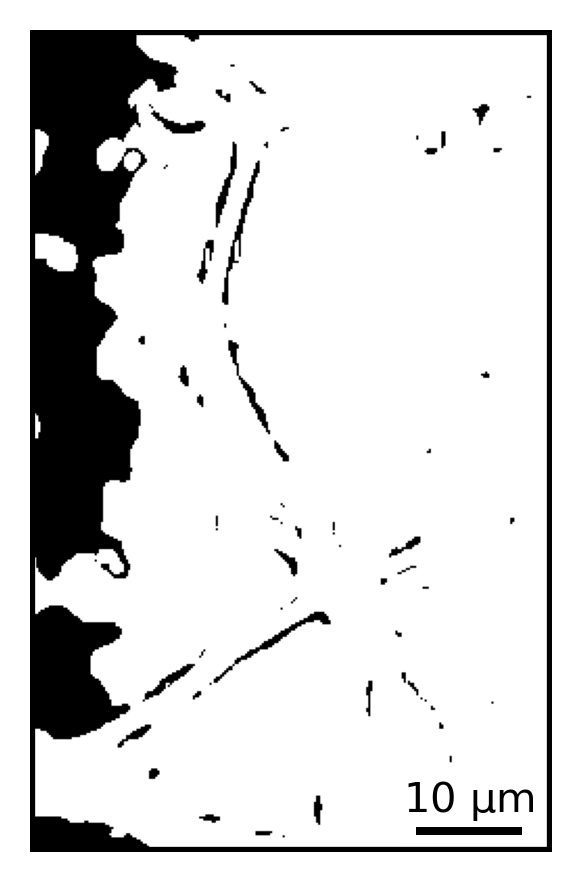

100%|██████████| 600/600 [00:02<00:00, 219.27it/s]


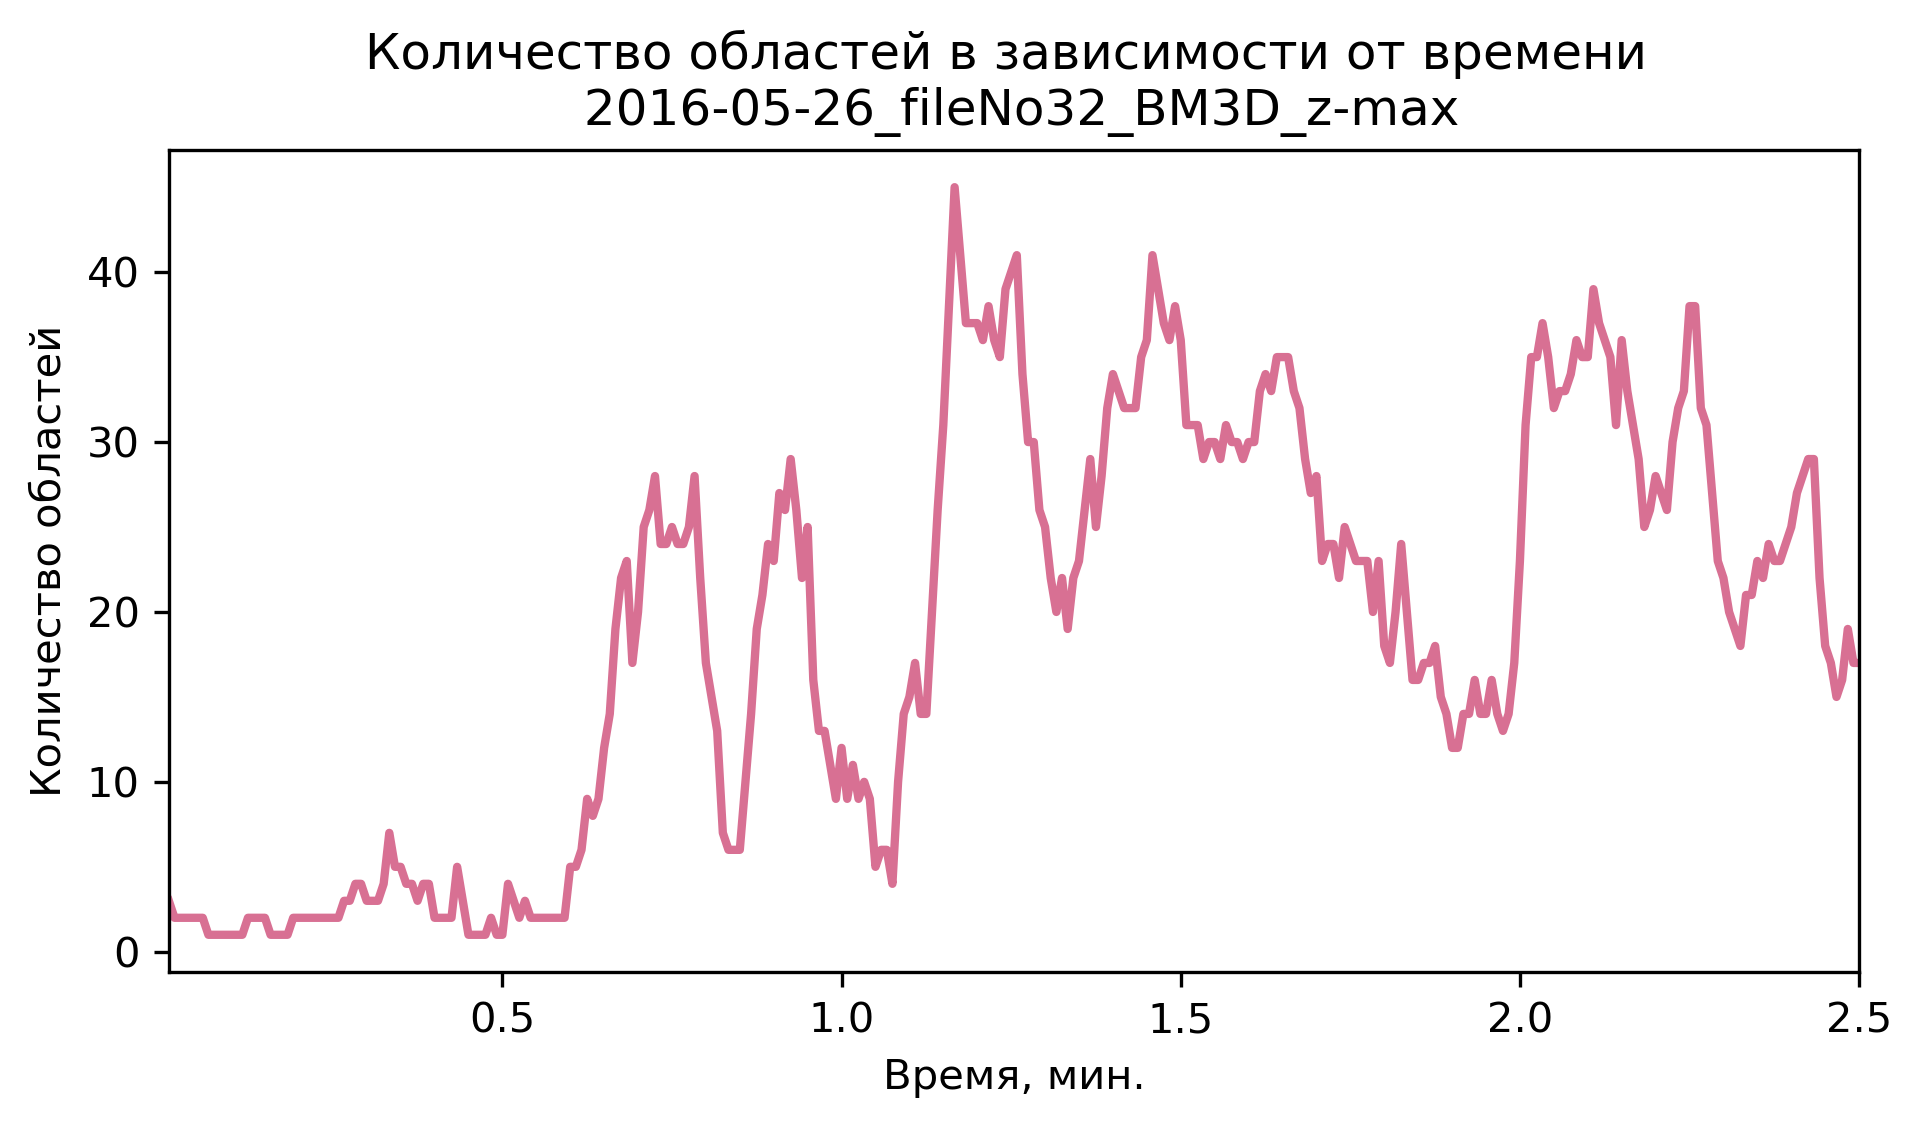

Fire Matrix for 2016-05-26_fileNo32_BM3D_z-max


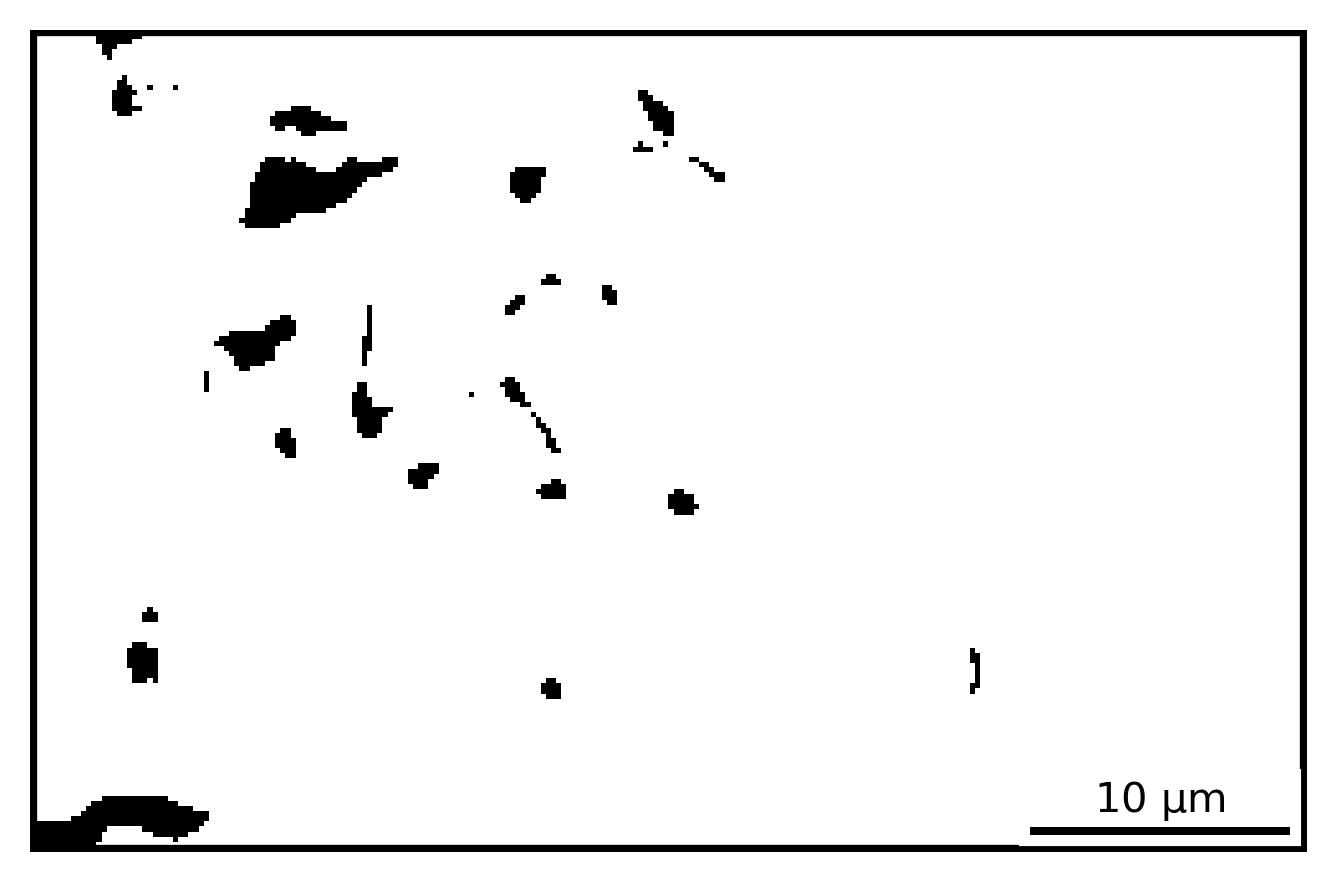

 94%|█████████▍| 567/600 [00:04<00:00, 119.64it/s]


KeyboardInterrupt: 

In [2]:
from my_astro_package import analysis
from pathlib2 import Path

data_path = Path('C:/Users/HP/Desktop/Task_Astrocytes')
save_path = Path(r'C:\Users\HP\Desktop\graphs2') 

result_df = analysis(data_path, save_path)

In [3]:
pip list 

Package                       Version         Editable project location
----------------------------- --------------- --------------------------------------------------
aiobotocore                   2.5.0
aiofiles                      22.1.0
aiohttp                       3.8.5
aioitertools                  0.7.1
aiosignal                     1.2.0
aiosqlite                     0.18.0
alabaster                     0.7.12
anaconda-anon-usage           0.4.2
anaconda-catalogs             0.2.0
anaconda-client               1.12.1
anaconda-cloud-auth           0.1.3
anaconda-navigator            2.5.0
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
async-timeout                 4.0.2
atomicwrites                  1.4